# PISA 2012 Data Exploration
### by Marc Angelo Acebedo

# Preliminary Wrangling

> PISA is a survey of students' skills and knowledge upon the end of their compulsory education, looking at how well-prepared they are for life after school. In the [original PISA dataset](https://github.com/nihlan97/Communicate-Data-Findings/blob/master/data/pisadict2012.csv), 485,490 students in 65 economies took part in this survey.


The overall motivation for this project is to *explore what factors affect a **student drive** and **academic performance**.* To do this, I diverge on 2 different paths: examining both ***environmental*** and ***background*** variables.

### After cleaning the original dataset as documented in my data wrangling process [here](https://github.com/nihlan97/Communicate-Data-Findings/blob/master/pisa2012_wrangle.ipynb), I isolated the following columns:

Environmental variables:
- **Teacher helpfulness** : how well the student feels teachers helped them in their success.
- **Sense of Belonging** : how well the student feels comfortable in the social setting of their school.
- **Acculturation** : how the well the student has acclimated to their academic environment.

Background:
- **Country**
- **Gender**
- **Mother Occupational Background**
- **Father Occupational Background**
- **Mother Immigrant Background**

Student drive variables:
- **Work Ethic** : how well the student feels about the effort they put in for schoolwork and math ethic.
- **Future Optimism** : how well the student feels their school prepared them for future career prospects.
- **Self Esteem** : how well the student views themselves in terms of academic standing and math self-concept.

Academic Performance:
- **Math Score**
- **Reading Score**
- **Science Score**

Both environmental and student drive variables contain ***normalized ratings out of 10***.

## Data Setup & Overview

In [4]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline
plt.style.use('bmh')

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [5]:
#look at 5 random entries
df = pd.read_csv('./data/pisa2012_clean.csv', low_memory = False)
df.sample(5)

student_id          country_code  gender  math_score  reading_score  \
467192        1803                Turkey  Female    644.4228       647.5256   
104217        8204           Switzerland  Female    649.7975       604.5534   
368079        4170                Norway    Male    487.8564       520.4441   
293266        2407                 Korea  Female    628.0651       614.9588   
14286         9544  United Arab Emirates  Female    439.5622       510.1099   

        science_score                mother_occupation  \
467192       700.3357    Vocational education teachers   
104217       634.5021                        Housewife   
368079       434.0172  Food service counter attendants   
293266       627.9746                 Shop supervisors   
14286        515.3301                        Housewife   

                                father_occupation mother_immigrant  \
467192          Generalist medical practitioners               NaN   
104217              Floor layers and tile setters              NaN   
368079    Sales and purchasing agents and brokers              NaN   
293266  Supply, distribution and related managers              NaN   
14286           Machinery mechanics and repairers              NaN   

        teacher_helpfulness  belonging  acculturation  work_ethic  \
467192                  NaN        NaN            NaN    7.375000   
104217             8.214286   7.500000            NaN    7.892857   
368079             8.035714   8.055556            NaN    2.000000   
293266             8.214286   7.222222            NaN         NaN   
14286              8.392857   8.055556            NaN    7.333333   

        future_optimism  self_esteem  
467192          10.0000          NaN  
104217           7.0000     7.500000  
368079           8.1250     6.363636  
293266           8.4375     5.909091  
14286            8.0000     6.818182

In [552]:
print('rows, columns = {}'.format(df.shape))

rows, columns = (485490, 15)


In [7]:
#transform student_id column to string
df.student_id = df.student_id.astype(str)

In [9]:
#verify student_id column type
df.student_id.dtype

dtype('O')

### What is the structure of the dataset?
> Our dataset consists of 485,490 students with 15 features. Student ID, country code, gender, mother and father occupations, mother immigrant are all categorical variables while the rest are numeric and continuous. Besides the test scores, all numerical fields are ***normalized ratings out of 10.***

### What is/are the main feature(s) of interest in the dataset?
> I'm interested in seeing ***how environment and background impact a student's drive and academic performance.*** 

- Teacher helpfulness, belonging, and acculturation all fall under **environmental factors.**
- Country code, gender, mother & father occupation, and mother immigrant status all fall under **background.**
- Work ethic, future optimism, and self-esteem all fall under **student drive.**
- Math, reading, and science scores all fall under **academic performance.**

> As a person who has gone to school in two different countries both in the West and in Asia, I have seen firsthand how differing cultural backgrounds value and treat students according to their academic performance. Additionally, I know of people who immigrated to places like Canada and the United States who struggled with adjusting to the new culture, and having not-so-optimal academic performance as a direct result. This dataset gave me the opportunity to answer pressing questions I've had surrounding culture, immigrants, and academics for the longest time.

These are the questions I'd like to pose in my exploratory stage:
- Does a higher academic performance reflect a high personal drive? 
- Do people who are better acclimated to their host environment generally have better test scores?
- Do student demographics and background have any effect on a student's drive at all?
- How does a positive environment reinforce a student's perception of themselves, among immigrants and non-immigrants?
- How does parent occupation correlate to a student's academic drive and/or performance?

### Features in the dataset that will help support my investigation into the features of interest

> For the most broad overview, I predict that ***the more catering the environment, the higher the student's drive and academic performance.*** As for the other factors, I also expect there will be a large gender gap between male and female students in regards to positive self-perception and test scores. Nonetheless, I also anticipate that students who are better acclimated to their environment, who feel as if they belong, will naturally have higher test scores and personal drives.

In [468]:
#create path variables to save future figures
PATH_UNIVARIATE = './visuals/univariate/'
PATH_BIVARIATE = './visuals/bivariate/'
PATH_MULTIVARIATE = './visuals/multivariate/'

# Univariate Exploration

## Missing Values

In [7]:
#check which columns have missing values
df.isnull().any()

student_id             False
country_code           False
gender                 False
math_score             False
reading_score          False
science_score          False
mother_occupation       True
father_occupation       True
mother_immigrant        True
teacher_helpfulness     True
belonging               True
acculturation           True
work_ethic              True
future_optimism         True
self_esteem             True
dtype: bool

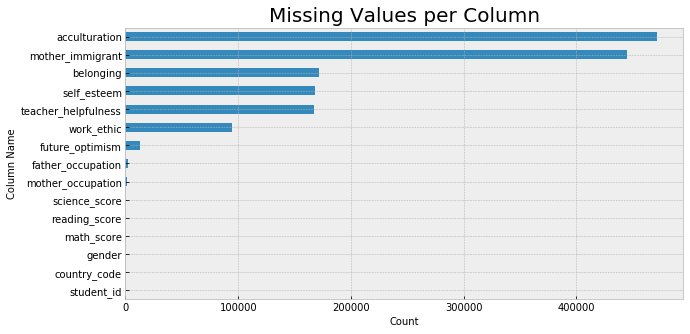

In [8]:
#create plot
plt.figure(figsize = [10, 5])
plt.title('Missing Values per Column', size = 20)
na_counts = df.isna().sum().sort_values(ascending = True)

na_counts.plot.barh(x = na_counts.values, y = na_counts.index);
plt.xlabel('Count', size = 10)
plt.ylabel('Column Name', size = 10)
plt.savefig(PATH_UNIVARIATE + 'missing-total.png')

**Observation 1:** As we have established above and in the data wrangling phase, all score column variables from (e.g. `science_score`) have no missing data. This means we do not have to worry about the reliability of these columns and/or whether they represent all students.

**Observation 2:** columns with the most amount of missing data are `acculturation` and `mother_immigrant`. Unfortunately, while immigration background is one of the key background factors I'm investigating, it is also the most unreliable. We must be ***extra*** wary when handling these variables, as there is no further evidence to suggest that these columns are truly representative of all students who took the survey. Therefore, to **interpret the results correctly,** we must say "According to all students who filled out the 'acculturation' and 'mother immigrant' questions . . . "

**Observation 3:** There is a large gap in missing data counts among the first 2 columns, then the next three columns, then `work_ethic`, and finally all other columns. There are **spikes** in the counts of missing data. It's worth noting that **these column groups are all similar in nature.** Belonging, self-esteem, and teacher_helpfulness are arguably variables with similar characteristics, so they would be grouped together in the same between "spikes." Acculturation and `mother_immigrant`, especially, are directly related to culture and immigration.  

## COUNTRY

In [9]:
#create function to generate horizontal bar chart showing percentages
def generate_pct_bar(df, cat_var, color):
    cat_counts = df[cat_var].value_counts()
    ax = sb.countplot(data = df, y = cat_var, order = cat_counts.index, palette = color)
    
    n_points = df.shape[0]
    locs, labels = plt.yticks()
    
    for p in ax.patches:
        percentage = '{:0.1f}%'.format(100 * p.get_width()/n_points)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y), size = 20)

In [545]:
#create function for quick plot polishing
def polish_plot(suptitle, title, xlabel, ylabel, path, save_name):
    plt.suptitle(suptitle, y = 1.05)
    plt.title(title, size = 20)
    plt.xlabel(xlabel, size = 15)
    plt.ylabel(ylabel, size = 15)
    plt.savefig(path + save_name)

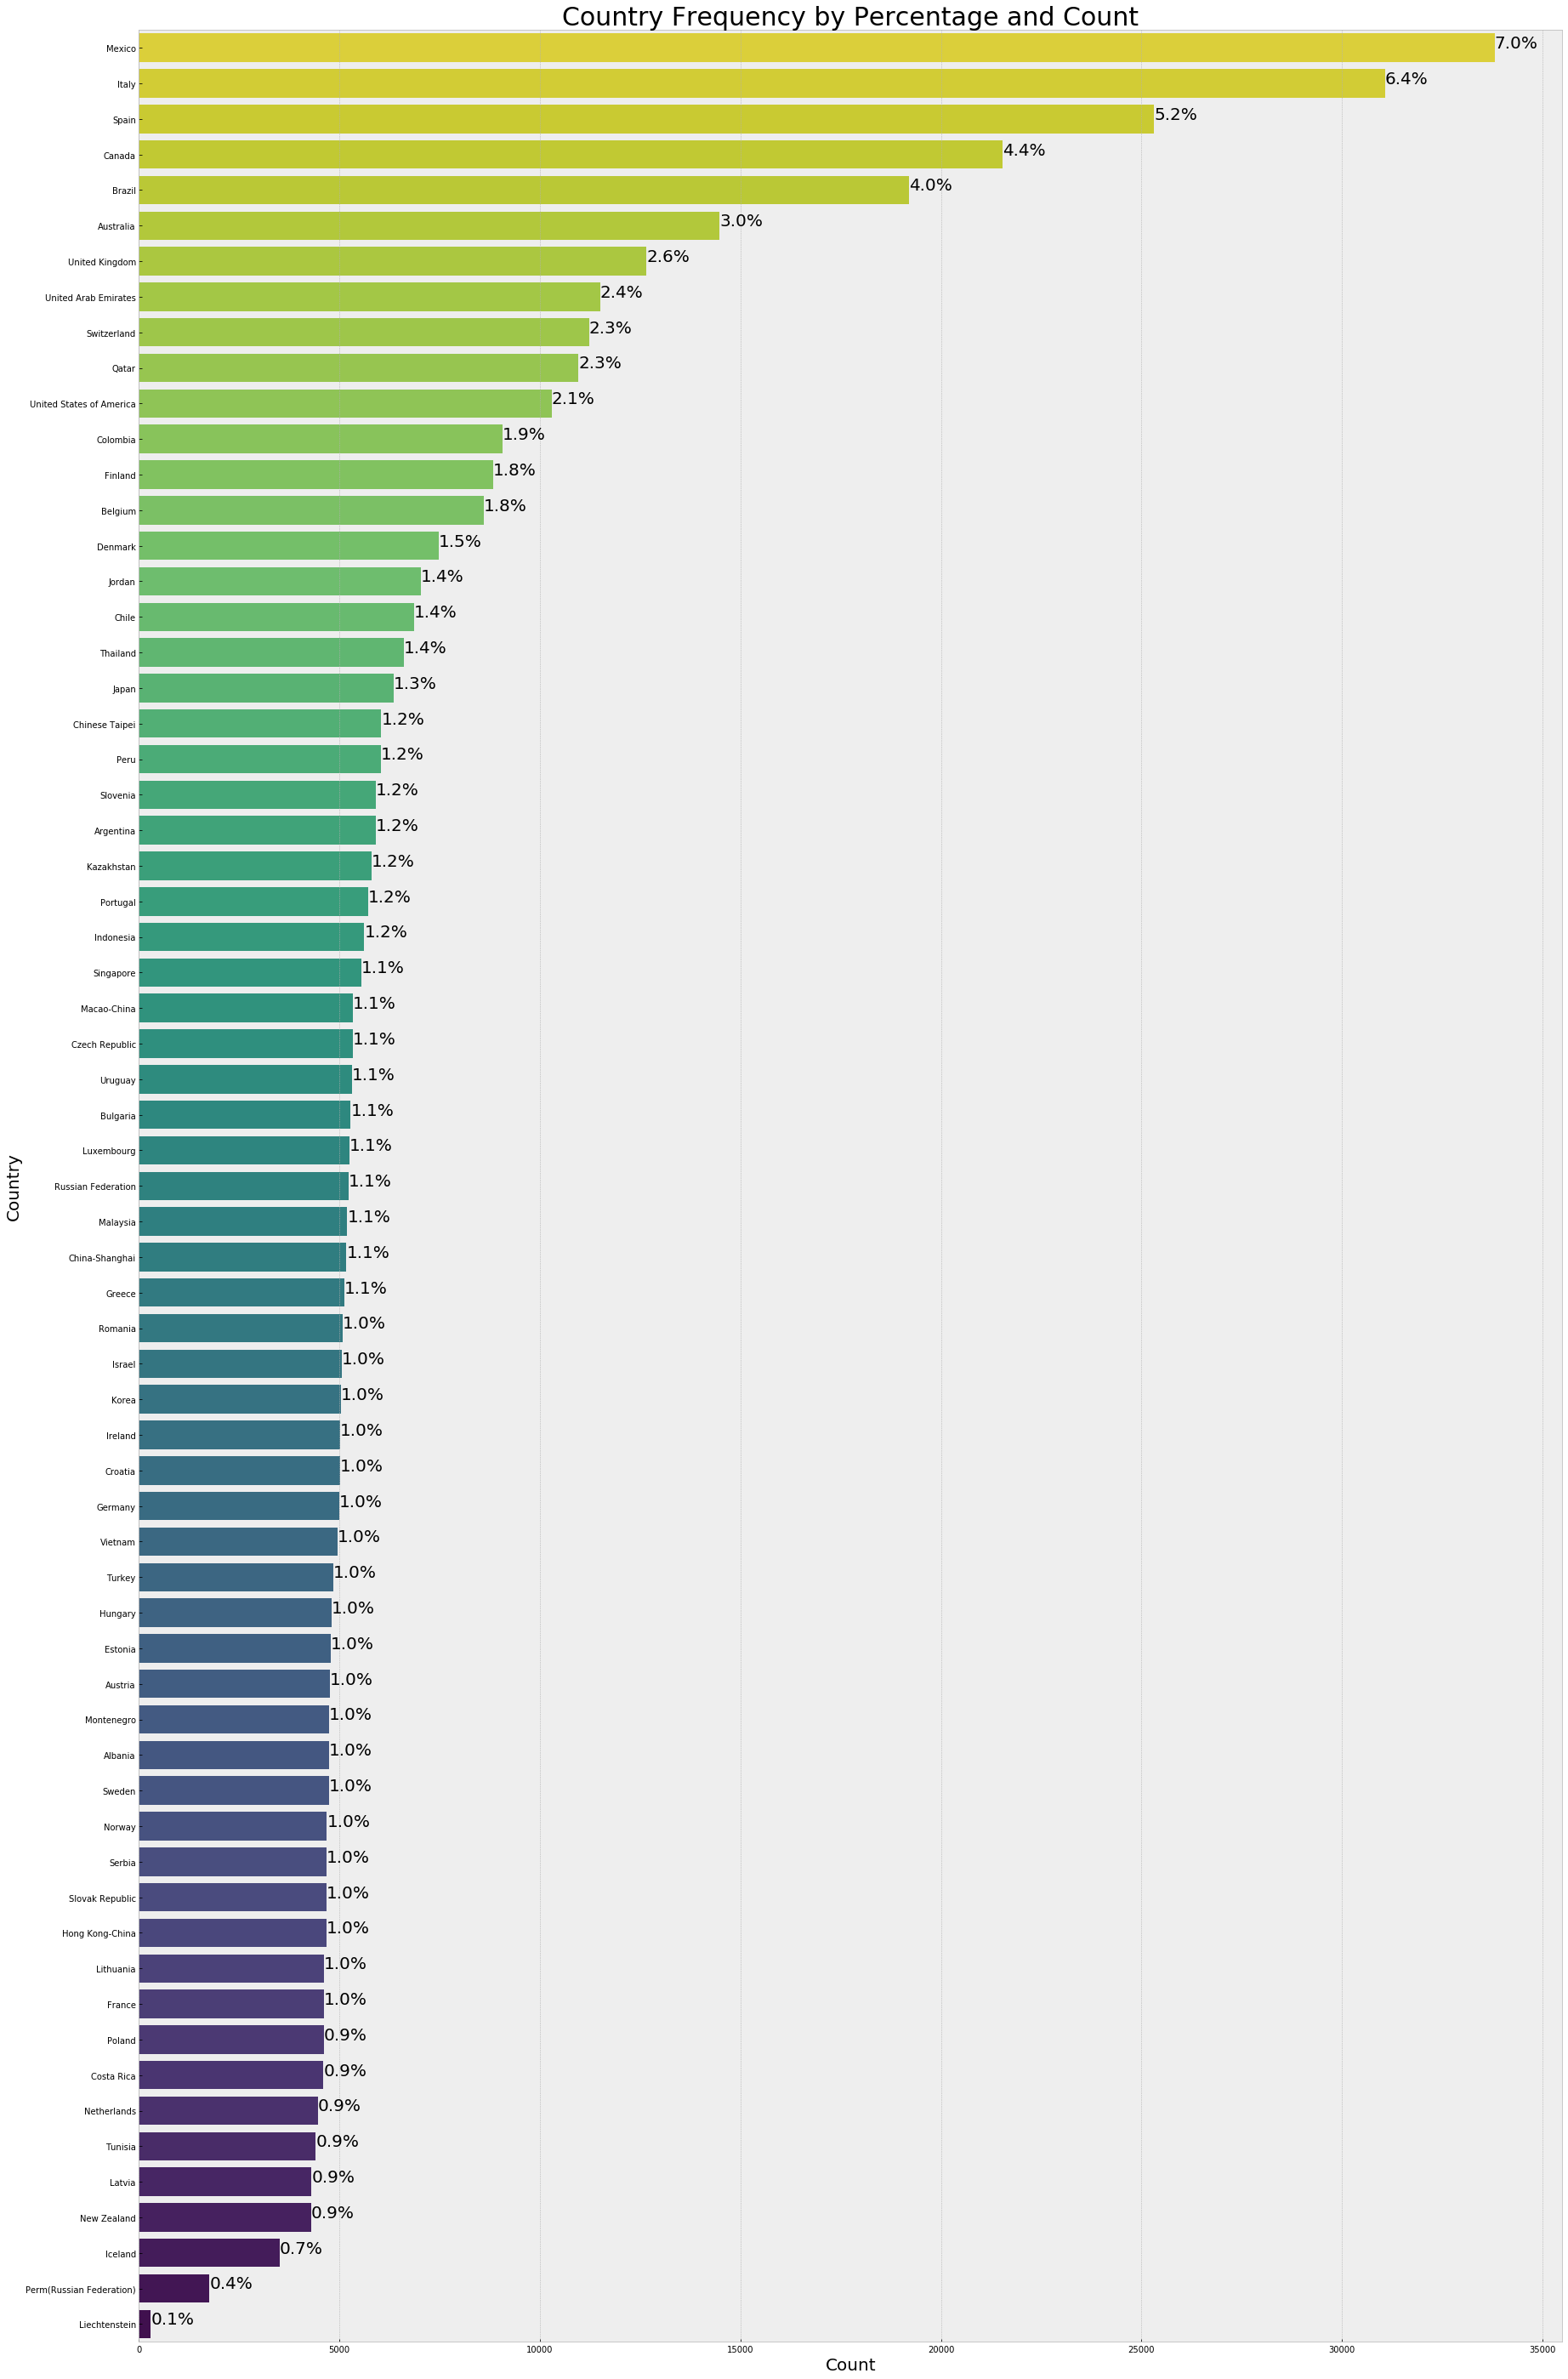

In [19]:
#country frequency
plt.figure(figsize=[30, 50])
generate_pct_bar(df, 'country_code', 'viridis_r')
plt.title('Country Frequency by Percentage and Count', size = 30)
plt.xlabel('Count', size = 20)
plt.ylabel('Country', size = 20)
plt.savefig('country.png')
#polish_plot(None, 'Country Frequency by Percentage', 'Count', 'Country', PATH_UNIVARIATE, 'country.png')

**Observation 1:** The top 5 most frequent countries are Mexico, Italy, Spain, Canada, and Brazil.

**Observation 2:** The bottom 5 most frequent countries are Liechtenstein, Perm, Iceland, New Zealand, and Latvia.


## GENDER

In [20]:
#adjust plot layout so x and y labels will show when saving
from matplotlib import rcParams
rcParams.update({'figure.autolayout' : True})

In [21]:
#suppress warnings
import warnings
warnings.filterwarnings(
    action='ignore', module='matplotlib.figure', category=UserWarning,
    message=('This figure includes Axes that are not compatible with tight_layout, '
             'so results might be incorrect.')
)

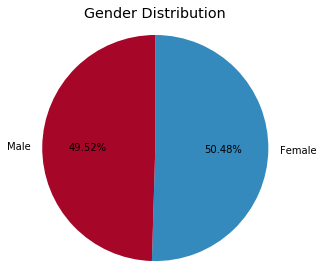

In [22]:
#create pie chart
gender_counts = df.gender.value_counts()
plt.pie(gender_counts, labels = gender_counts.index, startangle = 90, counterclock = False, autopct='%1.2f%%');
plt.axis('square');
plt.title('Gender Distribution')

plt.savefig(PATH_UNIVARIATE + 'gender-count.png');

**Gender is about evenly split with female students at 50.5% and males at 49.5%, so we can assume that comparisons by gender are fair and representative.**

### SCORES

**Math Score**


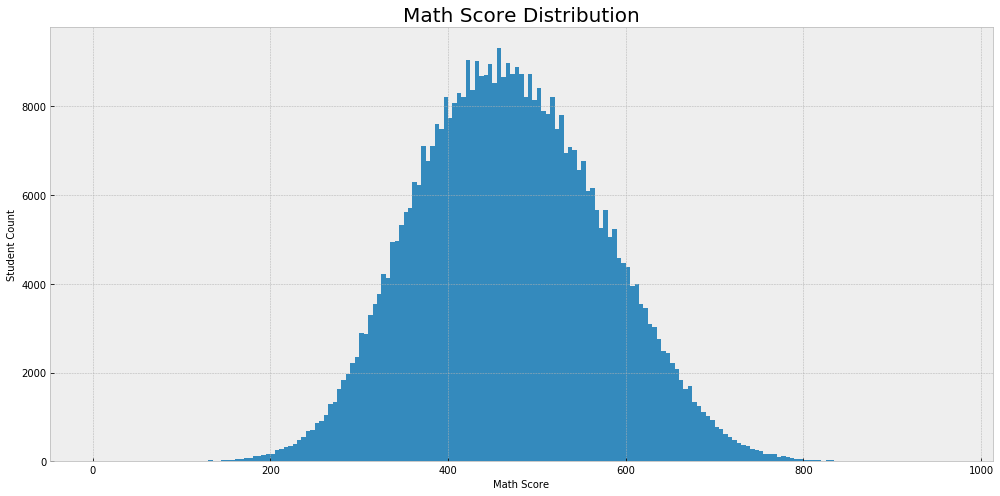

In [31]:
math_bins = np.arange(0, df['math_score'].max() + 5, 5)
plt.figure(figsize = [14, 7])

plt.hist(data = df, x = 'math_score', bins = math_bins);
plt.title('Math Score Distribution', size = 20)
plt.xlabel('Math Score', size = 10)
plt.ylabel('Student Count', size = 10);

plt.savefig(PATH_UNIVARIATE + 'hist-math.png');

**Reading Score**

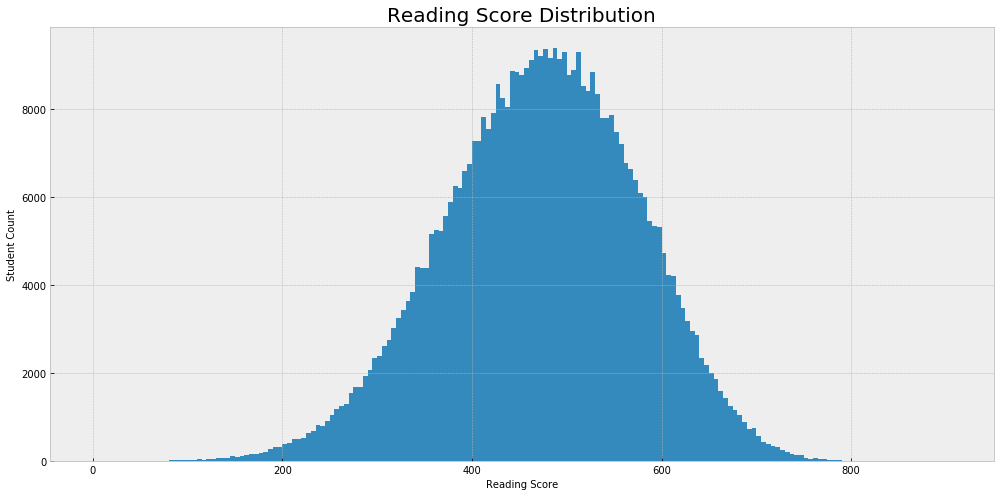

In [30]:
reading_bins = np.arange(0, df.reading_score.max() + 5, 5)
plt.figure(figsize = [14, 7])

plt.hist(data = df, x = 'reading_score', bins = reading_bins);
plt.title('Reading Score Distribution', size = 20)
plt.xlabel('Reading Score', size = 10)
plt.ylabel('Student Count', size = 10)

plt.savefig(PATH_UNIVARIATE + 'hist-reading.png')

**Science Score**

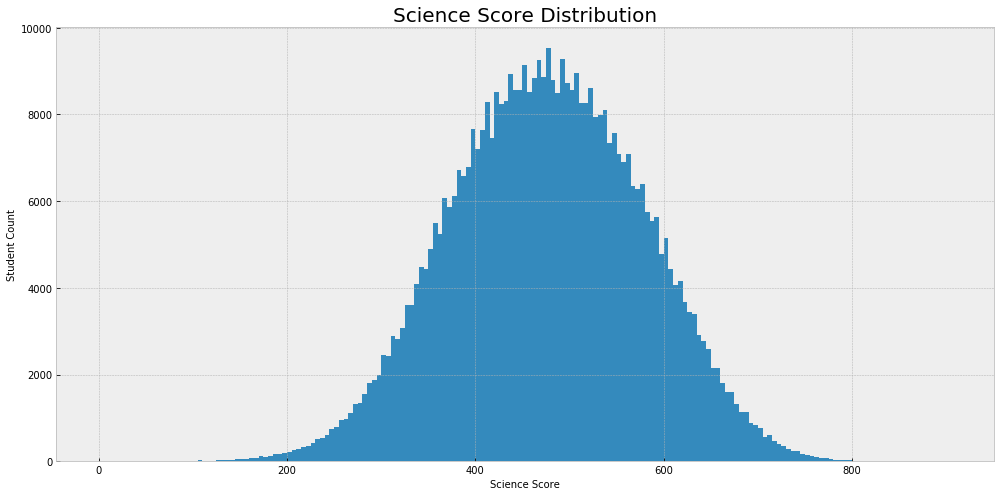

In [29]:
science_bins = np.arange(0, df.reading_score.max() + 5, 5)
plt.figure(figsize = [14,7])

plt.hist(data = df, x = 'science_score', bins = science_bins)
plt.title('Science Score Distribution', size = 20)
plt.xlabel('Science Score', size = 10)
plt.ylabel('Student Count', size = 10)

plt.savefig(PATH_UNIVARIATE + 'hist-science.png');

**Observation 1:** All math, reading, and science scores show a general normal distribution. However, math scores are *slightly* right-skewed while reading scores are *slightly* left-skewed, which means that on average, students tended to do *slightly* better on reading tests than math tests. Intuitively speaking, this makes sense. As for science score distribution, it is the most symmetric graph out of the three scores.

**Observation 2:** The peaks for math, reading, and science scores are approximately between 400 and 450, around 450, and around 500, respectively. For future reference, we can compare their medians to see if these approximations are more or less correct.


### PARENT OCCUPATIONS

> Since there were too many occupations to coherently fit in one visual, I focused only on the *top 50 most frequent occupations* for both mother and father.

**Mother Occupation**

In [32]:
#isolate DataFrame to contain entries with only top 50 mother occupations
m_occupation_order = df.mother_occupation.value_counts().drop('Missing')[:50].index
m_occupation_lim = df.loc[df.mother_occupation.isin(m_occupation_order)]

#check for only 50 unique values
m_occupation_lim.mother_occupation.nunique()

50

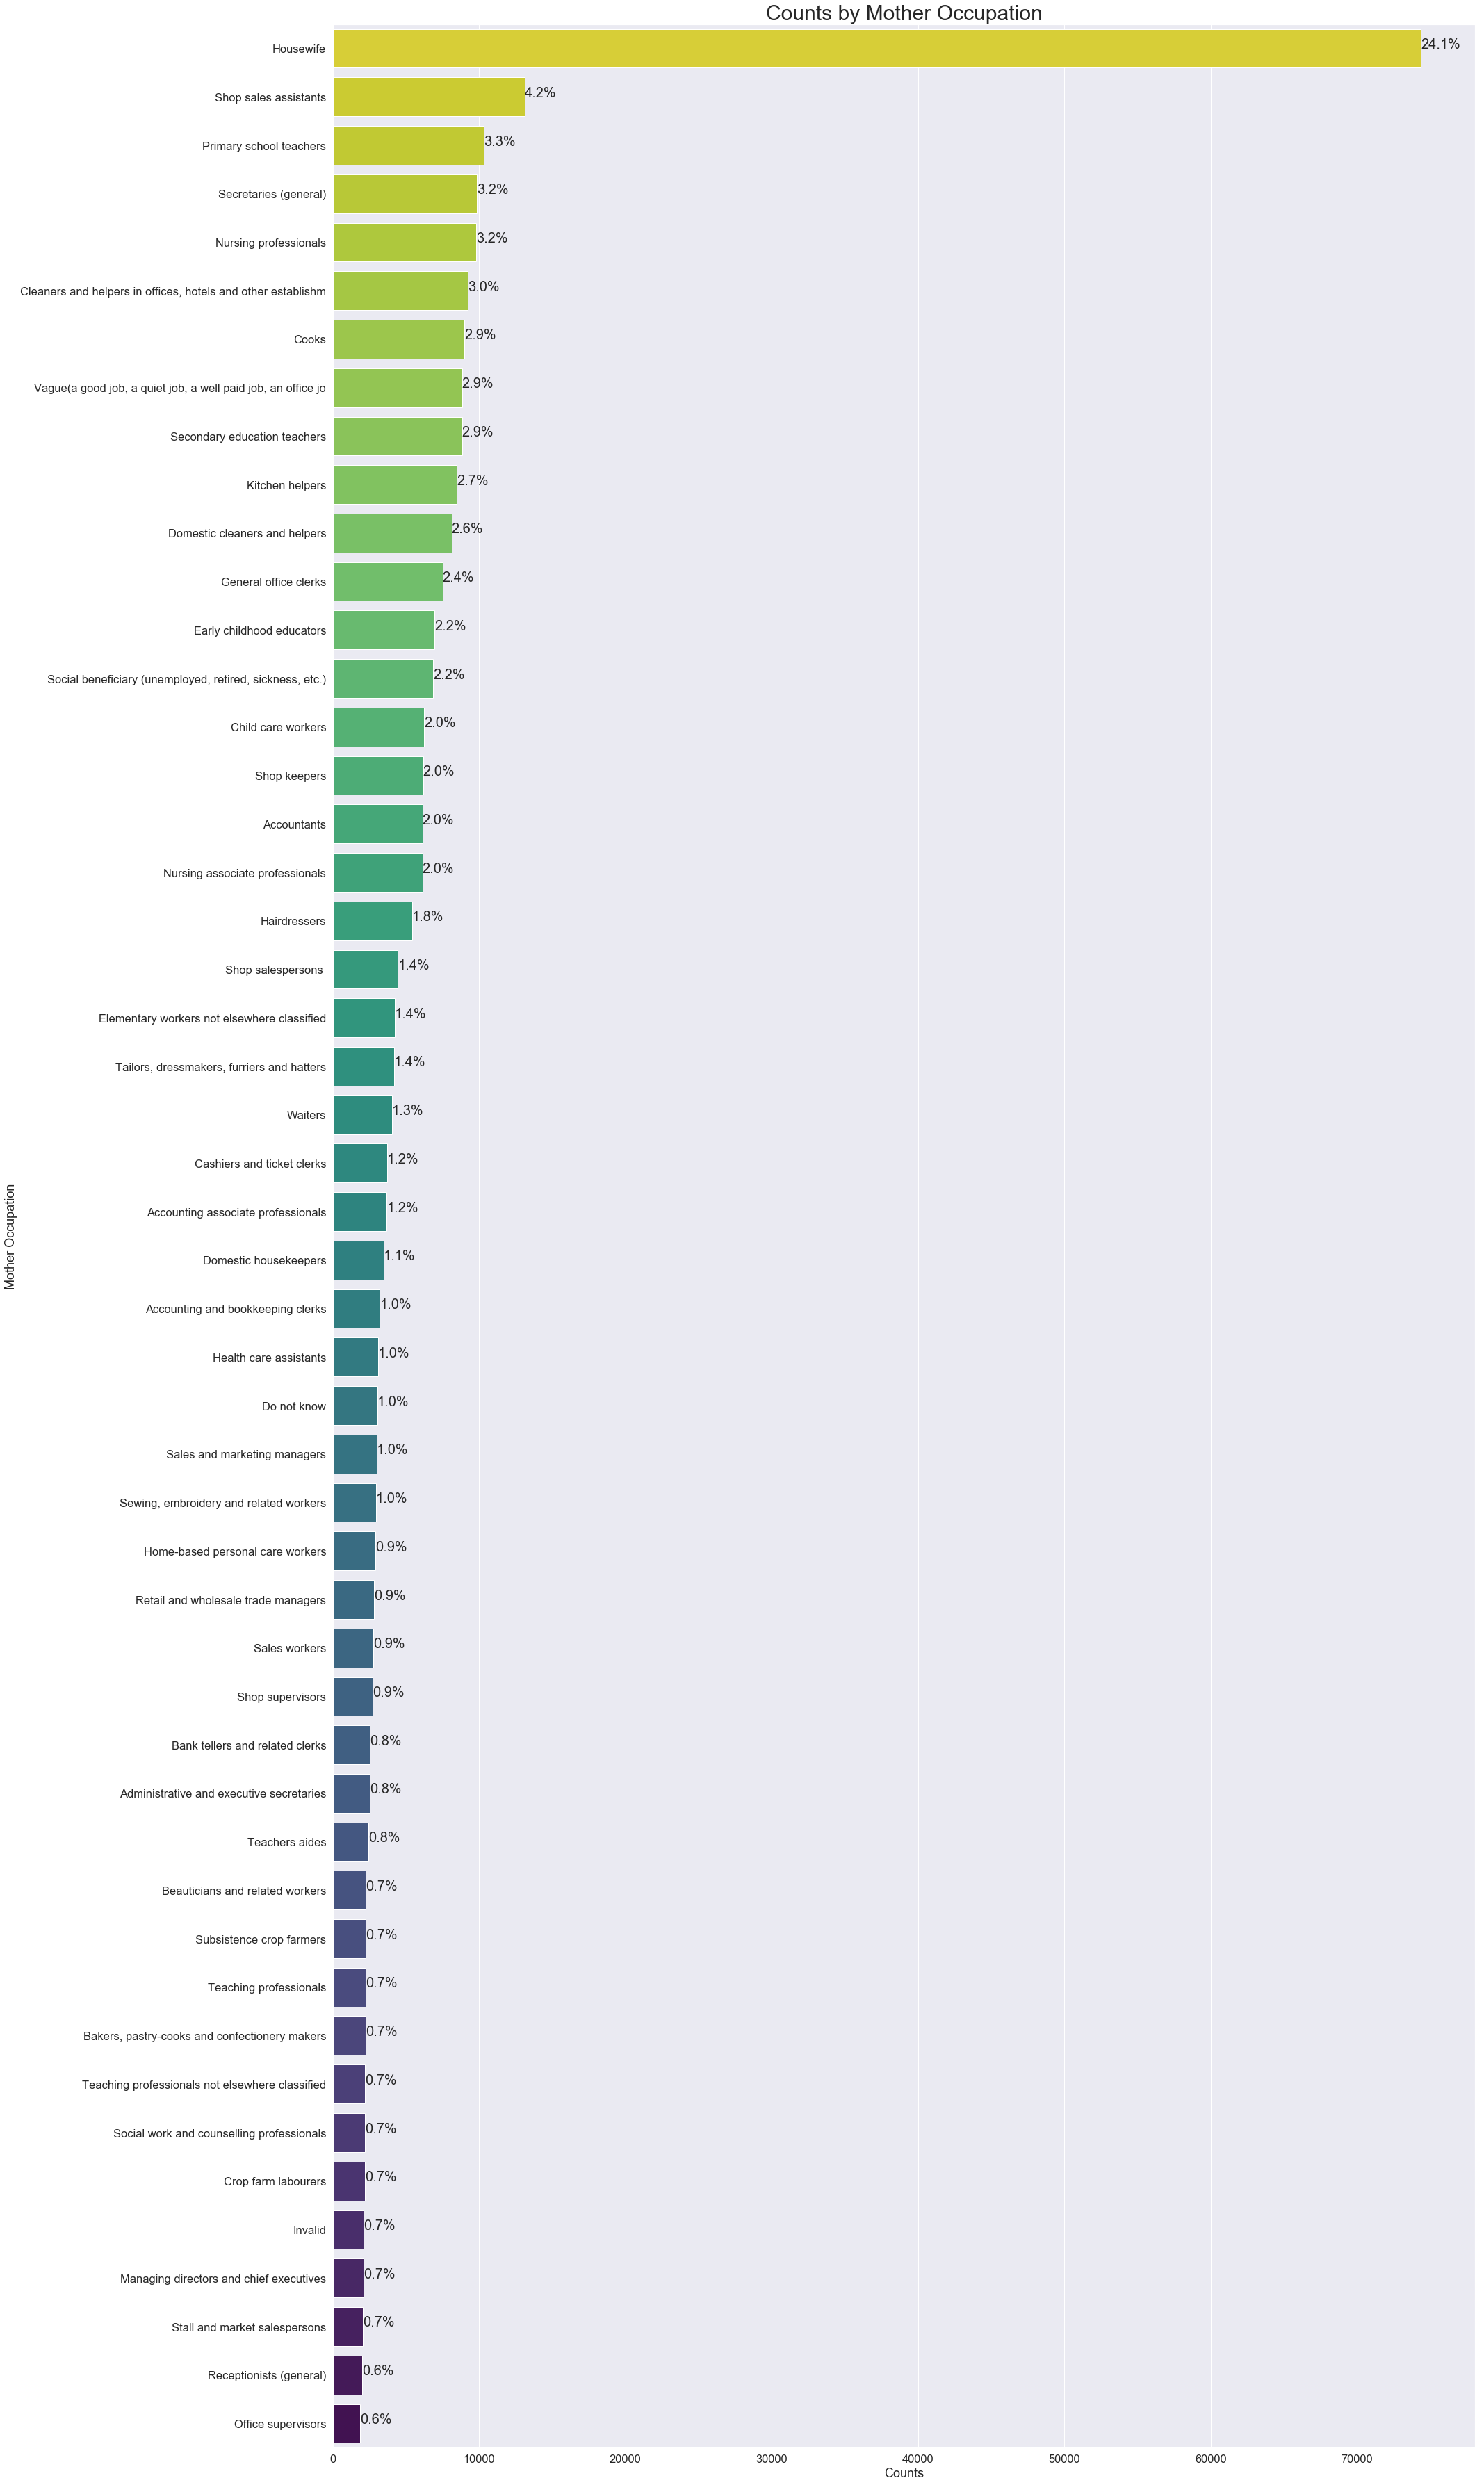

In [35]:
#generate mother occupation bar
plt.figure(figsize = [30, 50])
generate_pct_bar(m_occupation_lim, 'mother_occupation', 'viridis_r')

#polish
# sb.set(font_scale = 2)
plt.title('Counts by Mother Occupation', size = 30)
plt.ylabel('Mother Occupation')
plt.xlabel('Counts');

plt.savefig(PATH_UNIVARIATE + 'mother-occupation.png');

**Housewife is the most frequent occupation for a student's mother, at a disproportionate rate compared to the 2nd most frequent occupation: Shop sales assistant. The difference in proportions is 19.9%, with 24.1% for *Housewife* and 4.2% for *Shop sales assistant*. When considering that there are 50 occupations included, this is a significant proportion.**

**Father Occupation**

In [553]:
#isolate DataFrame to contain entries with only top 50 father occupations
f_occupation_order = df.father_occupation.value_counts()[:50].index
f_occupation_lim = df.loc[df.father_occupation.isin(f_occupation_order)]

#check for only 50 unique values
f_occupation_lim.father_occupation.nunique()

50

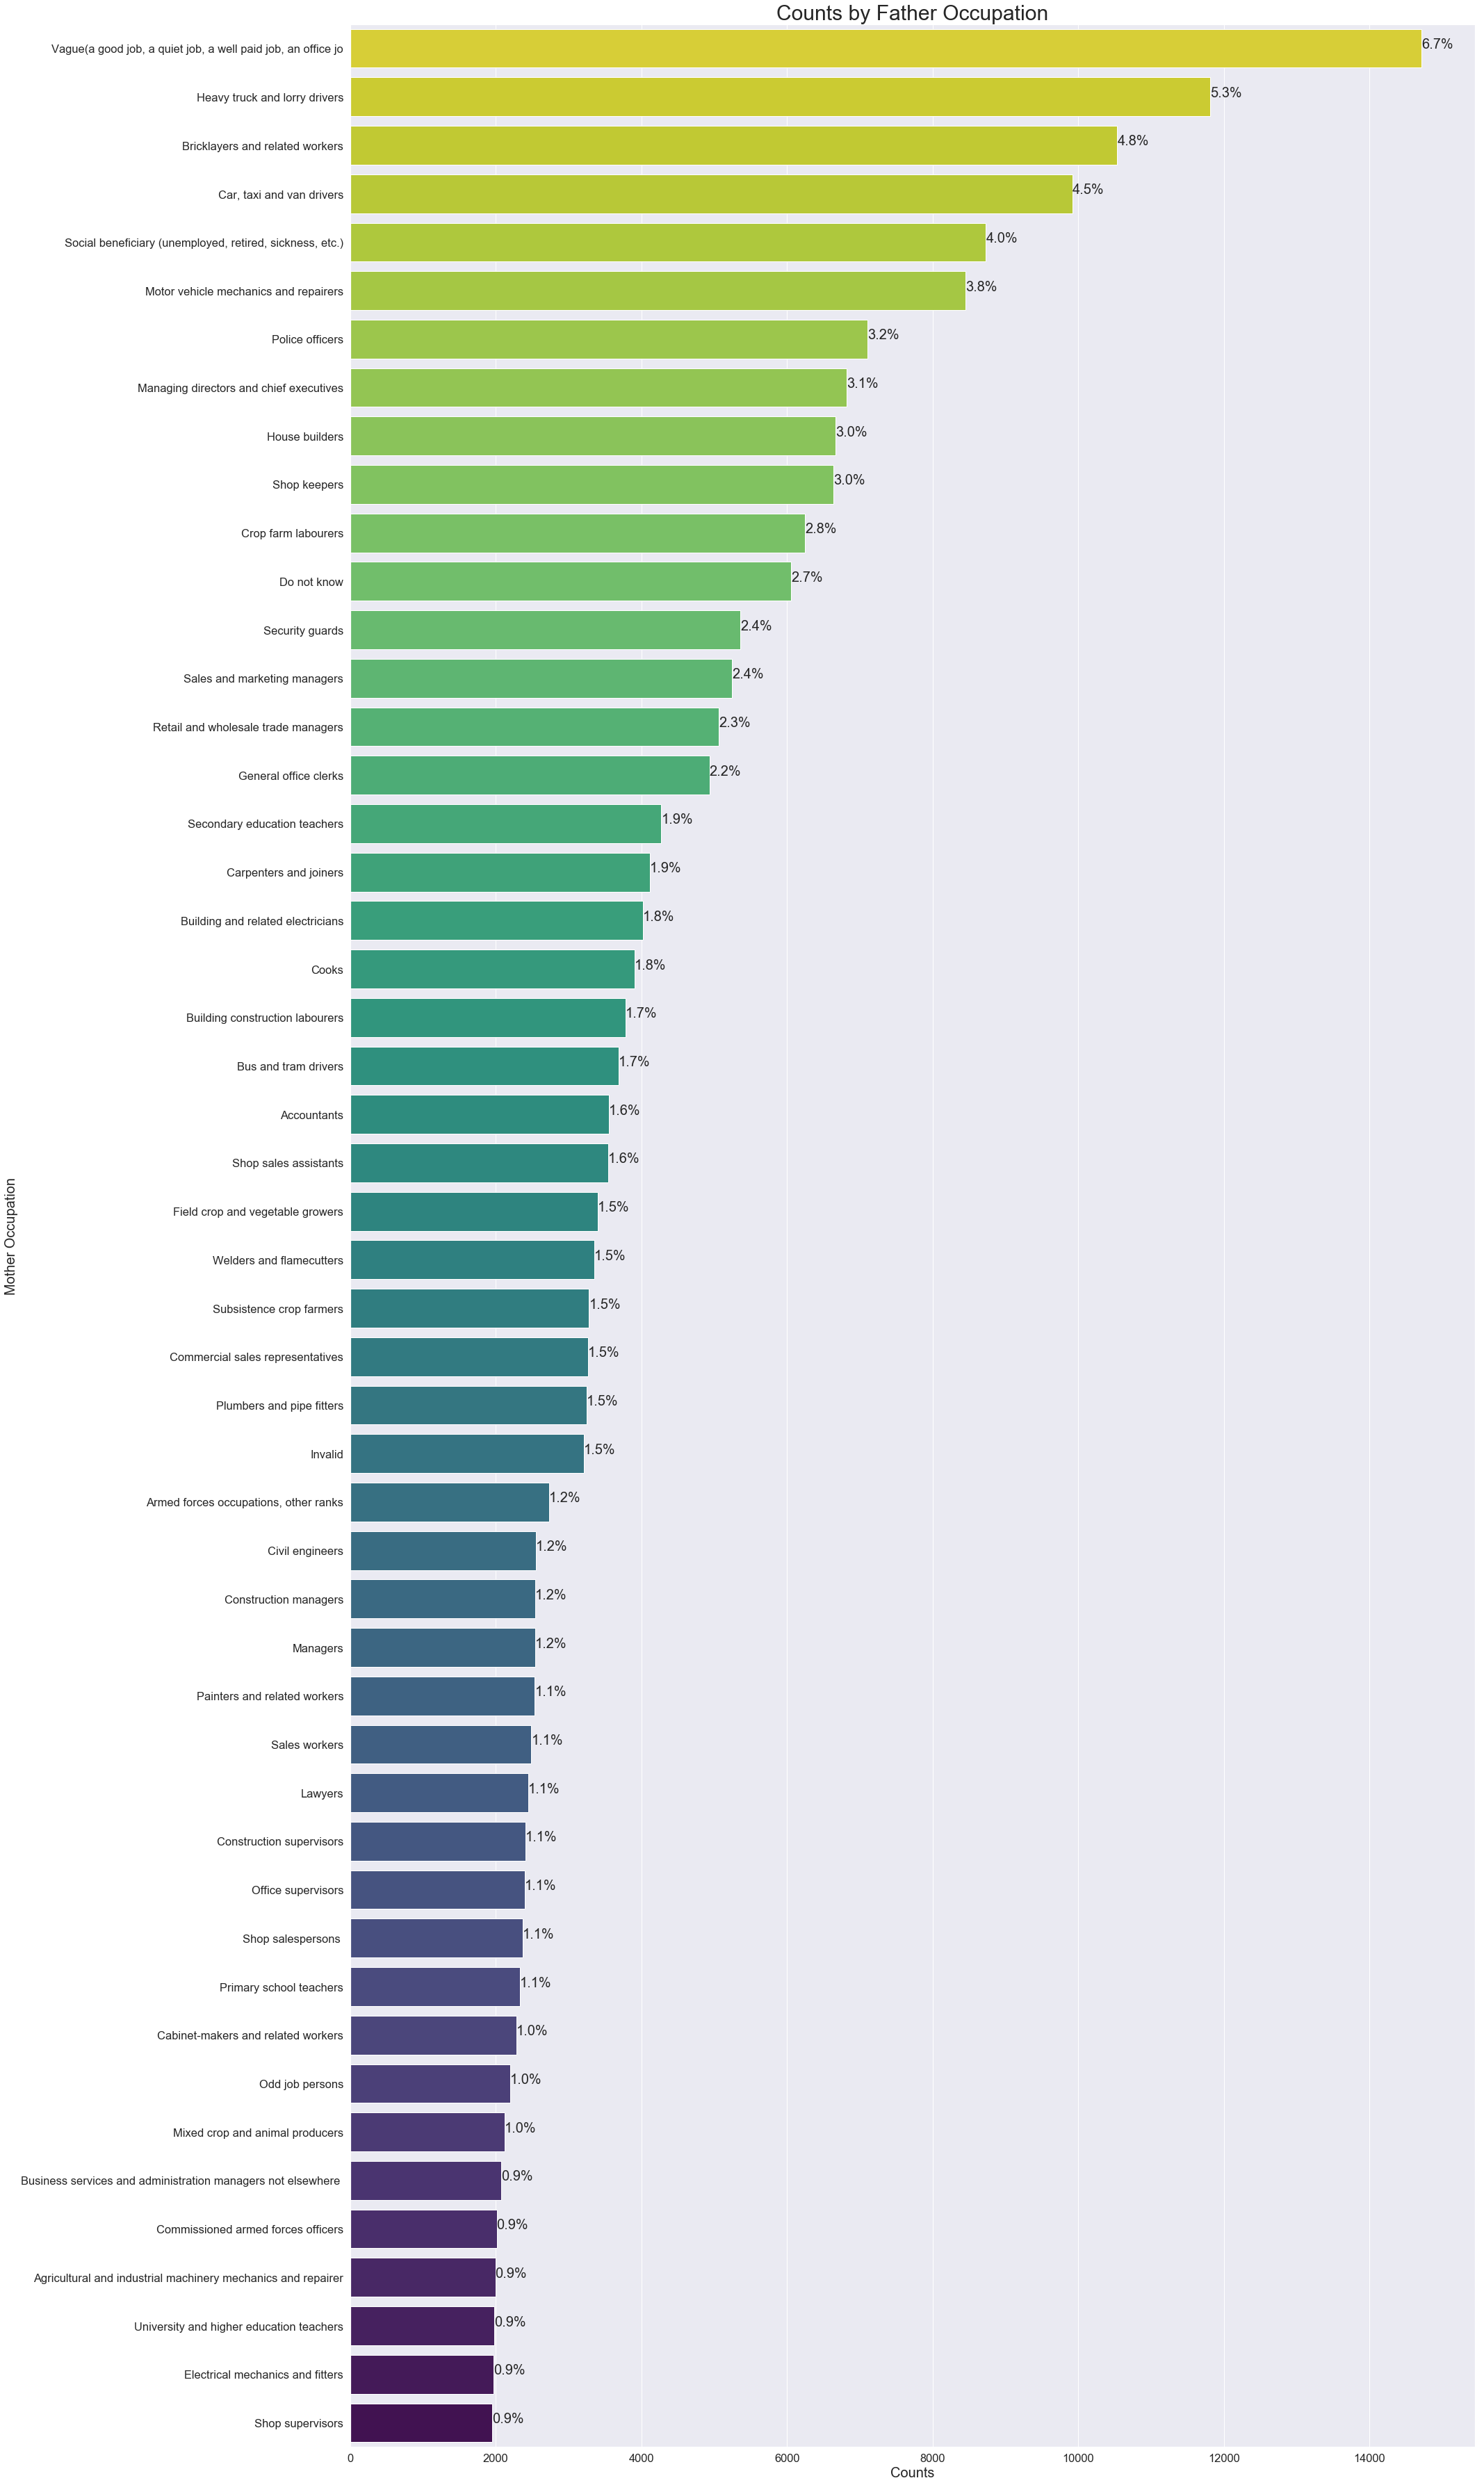

In [37]:
#create bar chart showing percentages
plt.figure(figsize = [30, 50]);
generate_pct_bar(f_occupation_lim, 'father_occupation', 'viridis_r')

#polish
plt.title('Counts by Father Occupation', size = 30)
plt.ylabel('Mother Occupation', size = 20)
plt.xlabel('Counts', size = 20);
plt.savefig(PATH_UNIVARIATE + 'father-occupation.png');

**The most commonly recorded father occupation is "Vague". Right after that is Heavy truck and lorry drivers. The difference in the frequency proportions of these 2 occupations is only 1.4%, which is not very significant in comparison to the disparity between the top 2 mother occupations.**

**Observation 1:** The gender gap in parent occupations is ***very*** clear. Mothers tend to hold occupations more related to public service, secretaries, caretaking, and domestic help, with the exception of managing directors and chief executives. On the other hand, fathers tend to hold occupations more directly related to blue-collar work and business.

> However, the parent/gender disparity of these jobs does not indicate whether or not the average student's mother or father has a higher salary.

**Observation 2:** Another big disparity is the number of max counts among both top 50 mother and father occupations. The maximum number of counts for mother occupation is over 70,000, while the max count is just a little over 14,000 for father occupation. I predict that the split in total counts between the top 50 parent occupations is ***not even***, therefore we may not be able to make any reliable comparisons between mother and father occupation. However, we know we ***can*** make separate comparisons of mother and father occupation with other variables in future bivariate and multivariate exploration.

> But just to make sure, let's plot the **total counts** of top 50 parent occupation in a pie chart instead of relying only on the most frequent counts.

In [38]:
#depict parent occupation counts in a pie chart
prnt_dict = {'Father has Occupation' : f_occupation_lim.shape[0],
            'Mother has Occupation' : m_occupation_lim.shape[0]
            }

series = pd.Series(prnt_dict)

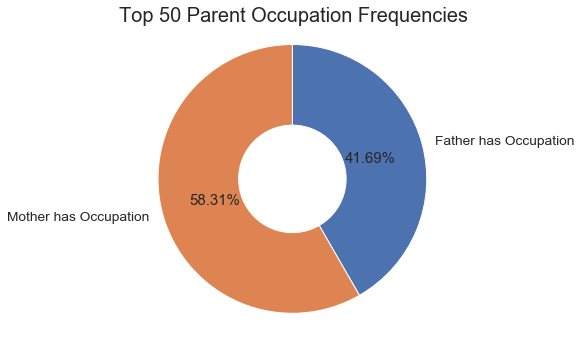

In [39]:
sb.set(font_scale = 1.25)
plt.figure(figsize = [10, 5])
plt.pie(series, startangle = 90, labels = series.index, counterclock = False, autopct='%1.2f%%');
plt.axis('square');
plt.title('Top 50 Parent Occupation Frequencies', size = 20)

#draw circle
center_circle = plt.Circle((0, 0), 0.40, fc = 'white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

plt.savefig(PATH_UNIVARIATE + 'prnt-occupation-frequencies');

**Even when taking *total counts of students who answered the mother/father occupation questions* into question, there is still a large uneven split between the number of records for mother and father occupation. Therefore, my prediction was correct: we cannot make any reliable comparisons between these two variables in future bivariate and multivariate exploration.**

### If Mother Is An Immigrant

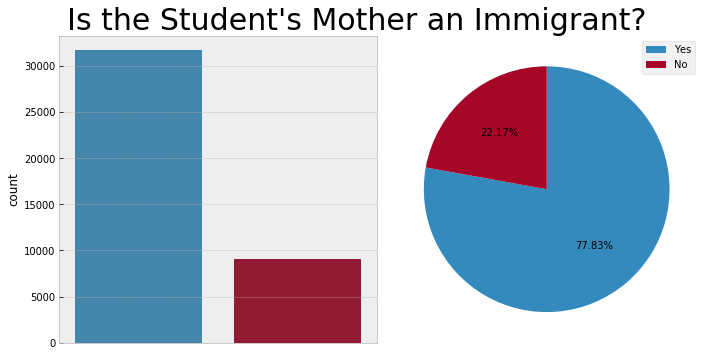

In [531]:
plt.figure(figsize = [10, 5])
plt.subplot(1, 2, 1)
sb.countplot(data = df, x = 'mother_immigrant', order = df.mother_immigrant.value_counts().index);
frame = plt.gca()
frame.axes.get_xaxis().set_visible(False)

plt.subplot(1, 2, 2)
plt.pie(df.mother_immigrant.value_counts(), startangle = 90, counterclock = False, autopct='%1.2f%%');

plt.legend(df.mother_immigrant.value_counts().index, loc = 'upper right')
plt.suptitle('Is the Student\'s Mother an Immigrant?', size = 30)
plt.tight_layout()
plt.subplots_adjust(top = 0.9)
plt.savefig(PATH_UNIVARIATE + 'mother-immigrant.png')

**Observation 1**: It appears that out of the approximately 40,000 students who answered this question, the overwhelming majority of students have immigrant mothers at 77.83%. This will be an interesting variable to examine alongside *acculturation*: ***how does coming from an immigrant family background affect one's ability to adapt to their host culture?***

## Environment Factors

> There are 3 variables for environment factors: `teacher_helpfulness`, `belonging`, and `acculturation.`

**For the ratings, I will set the bar as this: any score greater than 5 is favorable, less than 5 is unfavorable, while 5 is neutral.**

In [542]:
#create grid of distribution plots
def create_distplot(data, bins):
    fig = plt.figure(figsize = [12, 6])
    ax = sb.distplot(data, bins = bins)
    ax.minorticks_on()
    return fig, ax

In [543]:
bins_scores = np.arange(0, df.future_optimism.max() + 0.2, 0.2)

### Teacher Helpfulness

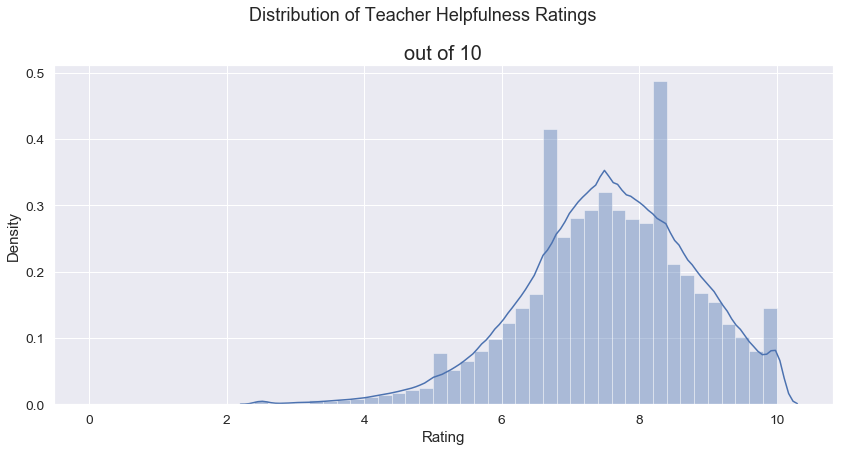

In [43]:
fig, ax = create_distplot(df.teacher_helpfulness.dropna(), bins = bins_scores)
polish_plot('Distribution of Teacher Helpfulness Ratings', 'out of 10', 'Rating', 'Density',
            PATH_UNIVARIATE, 'teacher-helpfulness.png')

**Observation:** As shown by the kernel density curve, the distribution of `teacher_helpfulness` scores is left-skewed. This means that ***more students, on average, found their teachers to be more helpful than not***: with a peak of approximately 7.5.

In [44]:
subplot_fields = {1 : [4.8, 5.5, 'Outlier around 5'],
                 2: [6.6, 6.8, 'Outlier between 6 and 7'],
                 3: [7.5, 8.5, 'Outlier between 8 and 8.5'],
                 4: [9.8, 10, 'Outlier between 8.5 and 10']}

def create_outlier_plots():
   
    bins = np.arange(0, df.belonging.max() + .05, .05)
    for i in range(1, 5):
        plt.subplot(1, 4, i)
        sb.distplot(df.teacher_helpfulness.dropna(), bins = bins)
        dict_val = subplot_fields[i]
        print(dict_val)
        plt.xlim(dict_val[0], dict_val[1])
        plt.title(dict_val[2])

### Belonging

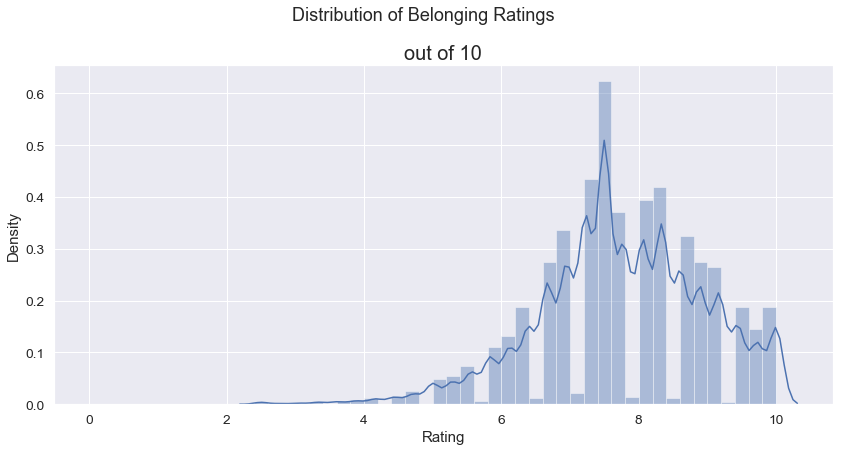

In [45]:
create_distplot(df.belonging.dropna(), bins = bins_scores)
polish_plot('Distribution of Belonging Ratings', 'out of 10', 'Rating', 'Density',
            PATH_UNIVARIATE, 'belonging.png')

**Observation 1:** As shown with the kernel density curve, the distribution of `belonging` scores is severely left-skewed. This means that ***more students, on average, felt like they belong and fit in socially to their school***: with a peak of approximately 7.5. 

**Observation 2:** Both the `teacher_helpfulness` and `belonging` distributions show peaks at around the same rating at 7.5

### Acculturation

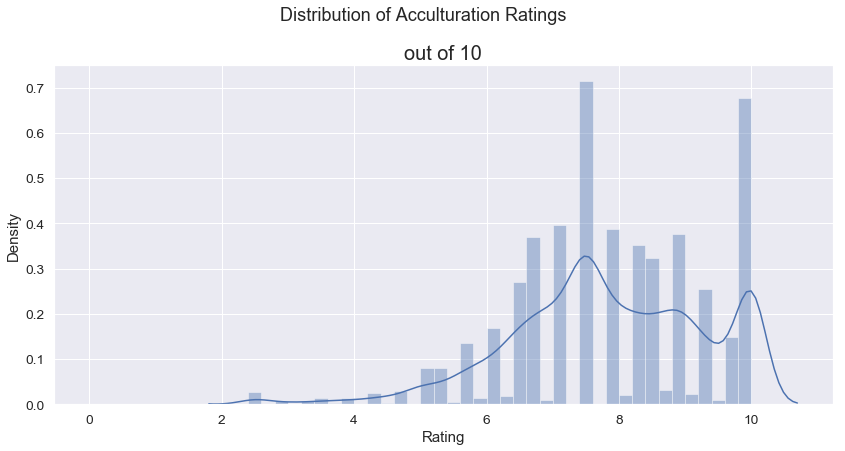

In [46]:
fig, ax = create_distplot(df.acculturation.dropna(), bins = bins_scores)
plt.minorticks_on()
polish_plot('Distribution of Acculturation Ratings', 'out of 10', 'Rating', 'Density',
            PATH_UNIVARIATE, 'acculturation.png')

**Observation:** Both the kernel density curve and the histogram show a bimodal distribution, both with peaks greater than 5. These peaks are found at approximately 7.5 and 10: the 2 most frequently occurring scores for the average student at any given time. These interpretations suggest that ***on average, for all students who answered the acculturation questions, there is no bias against the unfavorable side below 5.*** This indicates that the average student felt well-adapted to the host culture regardless of which bimodal "peak" they fall under.

## Student Drive

### Work Ethic

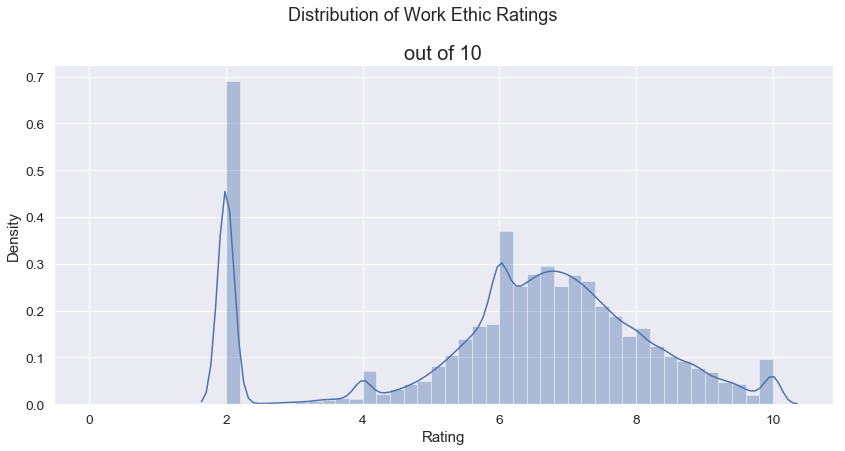

In [47]:
create_distplot(df.work_ethic.dropna(), bins = bins_scores)
polish_plot('Distribution of Work Ethic Ratings', 'out of 10', 'Rating', 'Density',
            PATH_UNIVARIATE, 'work-ethic.png')

**Observation 1:** There are 4 outliers: scores at **2, 4, 6, and 10**. The peaks in decreasing order are the following: *2, 6, 10, and 4*.

**Observation 2:** When taking outliers into account, the distribution appears to be multi-modal. However, when ignoring outliers, the `work_ethic` score distribution is bi-modal just like the `acculturation` score distribution.

**Observation 3:** While ignoring all other outliers and assuming that Rating = 2 is part of the distribution, there are 2 peaks: at **2 and 6**. However, the density of students who rated 2 for work ethic-related questions far outnumbers that of the other peak at 10: at a comparison of approximated density 0.69 to 0.09. ***This means that the overwhelming majority of students who answered work-ethic questions do not feel optimistic about their work effort.***

> Let's "zoom in" on the distribution now, without accounting for the outlier at Rating = 2.

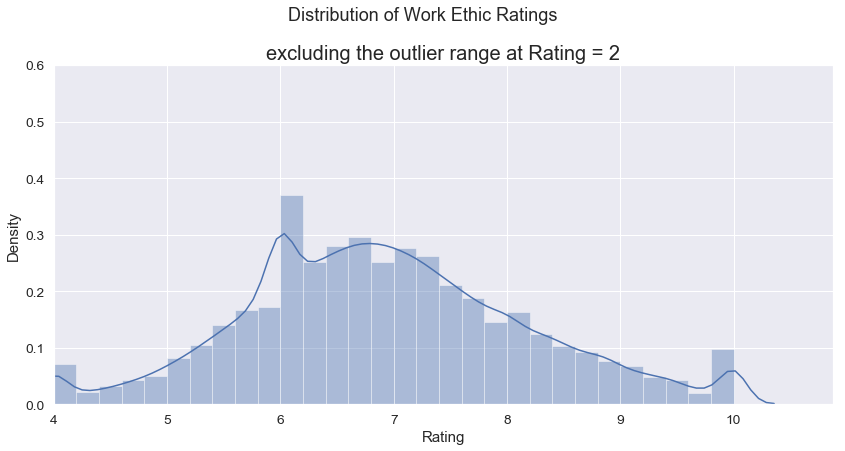

In [48]:
fig, ax = create_distplot(df.work_ethic.dropna(), bins = bins_scores)
ax.set(xlim = (4), ylim = (0, 0.6))
polish_plot('Distribution of Work Ethic Ratings', 'excluding the outlier range at Rating = 2', 'Rating', 'Density',
            PATH_UNIVARIATE, 'work-ethic-normal.png')

**Observation:** When ignoring the outliers from the 1st peak to the 2nd peak, the distribution for Work Ethic appears to be ***normally distributed.*** Albeit there is yet another peak at Rating = 6. 

> So far, ***Work Ethic is the most irregular variable we have in terms of scoring distribution. It has 4 peaks with the highest one being an outlier.***
    - when including outliers, the distribution is multi-modal. 
    - When excluding only the outlier at Rating = 2, the distribution is bimodal.
    - when excluding all outliers, the distribution is normal.

### Future Optimism

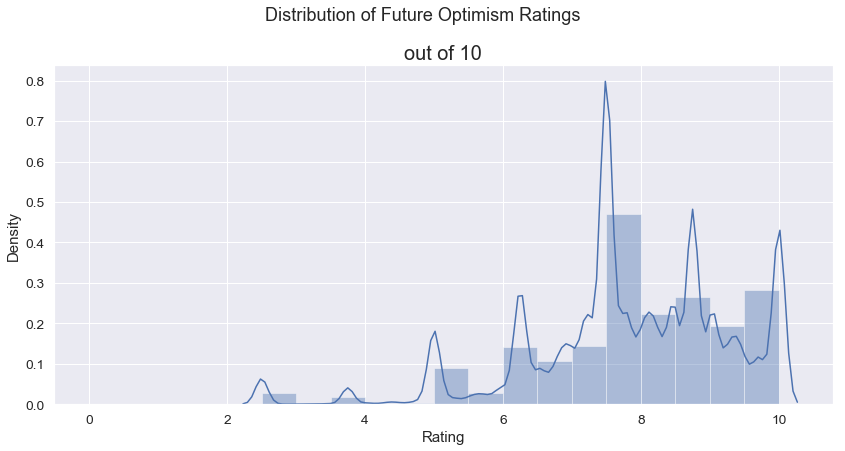

In [51]:
bins_adjust = np.arange(0, df.future_optimism.max() + 0.5, 0.5)
create_distplot(df.future_optimism.dropna(), bins = bins_adjust)
polish_plot('Distribution of Future Optimism Ratings', 'out of 10', 'Rating', 'Density', 
            PATH_UNIVARIATE, 'future-optimism.png')

**Observation 1:** Although the kernel density curve is the wonkiest out of all the score distribution graphs, the histogram depicts a somewhat left-skewed distribution, with a **peak of scores between 7.5 and 8.** This means that for all students who answered questions related to outlooks of their future, on average, they felt favorable that the school has helped them establish post-high school plans.

### Self Esteem

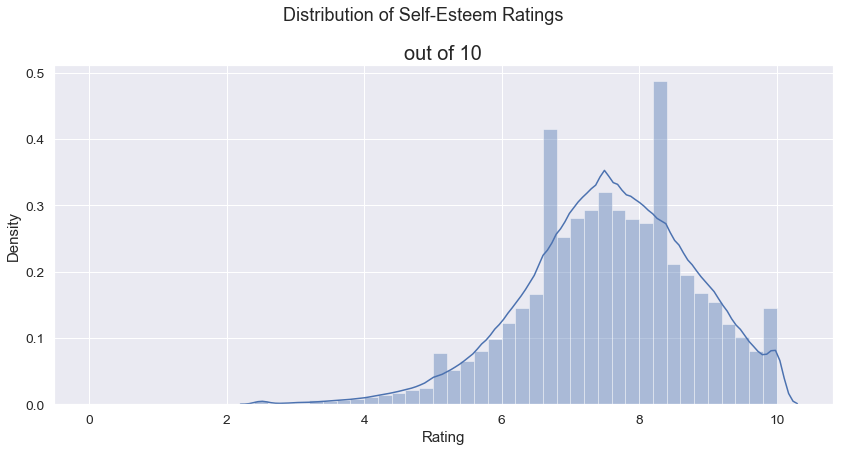

In [52]:
create_distplot(df.teacher_helpfulness.dropna(), bins = bins_scores)
polish_plot('Distribution of Self-Esteem Ratings', 'out of 10', 'Rating', 'Density',
            PATH_UNIVARIATE, 'self-esteem.png')

**Observation 1:** The kernel density curve for students who answered questions related to self-esteem depicts a peak in scores around **7.5**. This curve is much smoother with an actual distinctive skew *free of outliers* unlike the ones for Work Ethic , Future Optimism, and and Acculturation.

**Observation 2:** I find it surprising that the distributions of Teacher Helpfulness, Sense of Belonging, Acculturation, Future Optimism, and Self-Esteem all have peaks in relatively the same ranges from **7.5 - 8.**

I theorize the following: ***Maybe most students are just reluctant at giving low and negative answers, so they tend to write down ratings higher than they normally would.*** At least, in my experience, that is the general tendency of many students.


### Discuss the distributions of the variables of interest. Were there any unusual points? Did I need to perform any transformations?

**Mother Occupation** - "Housewife" is the most common mother occupation, out of all students who answered this question. This is an unusual point because in comparison to the 2nd most common mother occupation, "Shop sales assistant," the difference in frequency is 19.9%, with 24.1% for Housewife and 4.2% for Shop sales assistant.

**Mother Immigrant** - Of all the students who answered the Mother Immigrant question, the overwhelming majority of students answered "yes" at 77.83%. This will be an interesting variable to dig more in-depth in the future exploration stages.

**Work Ethic** - The outlier at Rating = 2 is so significant that it ***affects the entire distribution***.


### Of the features investigated, were there any unusual distributions? Did I perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did I do this?

**Work Ethic** -  When including the outlier at Rating = 2, the Work Ethic kernel density curve and histogram display a severe left-skew. However, without this outlier, the distribution appears more or less normally distributed. This raises the question of: ***to include or not to include the outlier?*** I have decided that for all future exploration, it would be more beneficial to examine this variable in both scenarios: with and without.

***All variables under Environment and Student Drive sections appear left-skewed, with the exception of Work Ethic without the outlier.***

***This indicates that of the students who answered Environment and Student Drive questions, the average student picked answers that were more favorable to their self-image and/or perception of the school.***

## Bivariate Exploration

### Student Drive vs. Environment

In [15]:
student_drive = ['work_ethic', 'future_optimism', 'self_esteem']
environment = ['teacher_helpfulness', 'belonging', 'acculturation']
scores = ['math_score', 'reading_score', 'science_score']

In [20]:
def generate_scatterplots(df, x_list, y_list):
    fig, ax = plt.subplots(len(y_list), len(x_list), figsize = [20, 10])
    ax = ax.flatten()
    
    j = 0
    k = 0
    
    for i in range(len(y_list) * len(x_list)):
        plt.sca(ax[i])
        if (i == 3 or i == 6):
            j = 0
            k += 1
        sb.scatterplot(x = df[x_list[j]], y = df[y_list[k]])
        
        plt.ylabel(y_list[k].title().replace('_', ' '))
        plt.xlabel(x_list[j].title().replace('_', ' '))
        
        j += 1

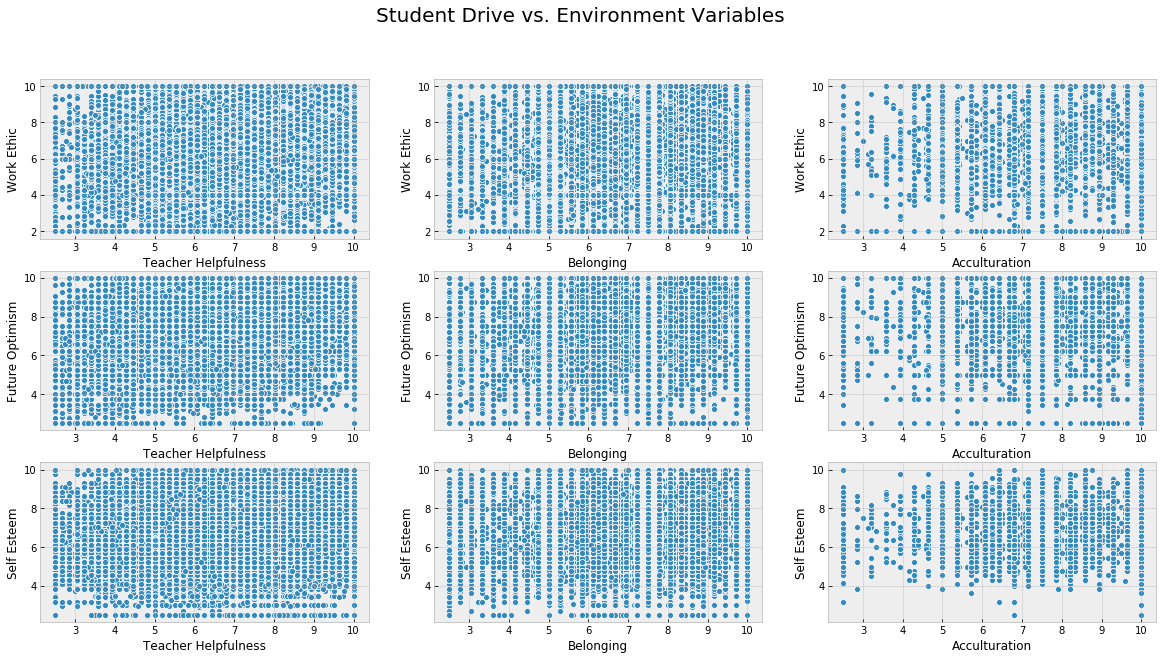

In [469]:
generate_scatterplots(df, environment, student_drive)
plt.suptitle('Student Drive vs. Environment Variables', size = 20)
plt.savefig(PATH_BIVARIATE + 'student-environment-scatter.png')

**Observation 1:** There is a very clear case of overplotting of all student drive vs. environment plots. This makes any interpretation largely unreliable.

**Observation 2:** The only graph with a distinguishable correlation is Self Esteem vs. Acculturation. It appears that the trend is slightly linear with a positive relationship.

Since overplotting is a problem with these variables, let's do line plots instead:

In [252]:
def generate_line_plots(df, x_list, y_list, bin_size):
    fig, ax = plt.subplots(len(y_list), len(x_list), figsize = [20, 10])
    ax = ax.flatten()
    
    j = 0
    k = 0
    
    for i in range(len(y_list) * len(x_list)):
        plt.subplot(len(y_list), len(x_list), i + 1)
        if (i == 3 or i == 6):
            j = 0
            k += 1
        
        bins_e = np.arange(0, df[x_list[j]].max() + bin_size)
        displ_binned = pd.cut(df[x_list[j]], bins_e, include_lowest = True, labels = False)
        comb_mean = df[y_list[k]].groupby(displ_binned).mean()
        comb_std = df[y_list[k]].groupby(displ_binned).std()
        comb_sems = df[y_list[k]].groupby(displ_binned).sem()
        
        difference = len(bins_e) - len(comb_mean)
        bins_c = bins_e[:-difference]
        
        plt.errorbar(x = bins_c, y = comb_mean, yerr = comb_sems)
        plt.xlabel(x_list[j].title().replace('_', ' '))
        plt.ylabel('Mean ' + y_list[k].title().replace('_', ' '))
        
        j += 1

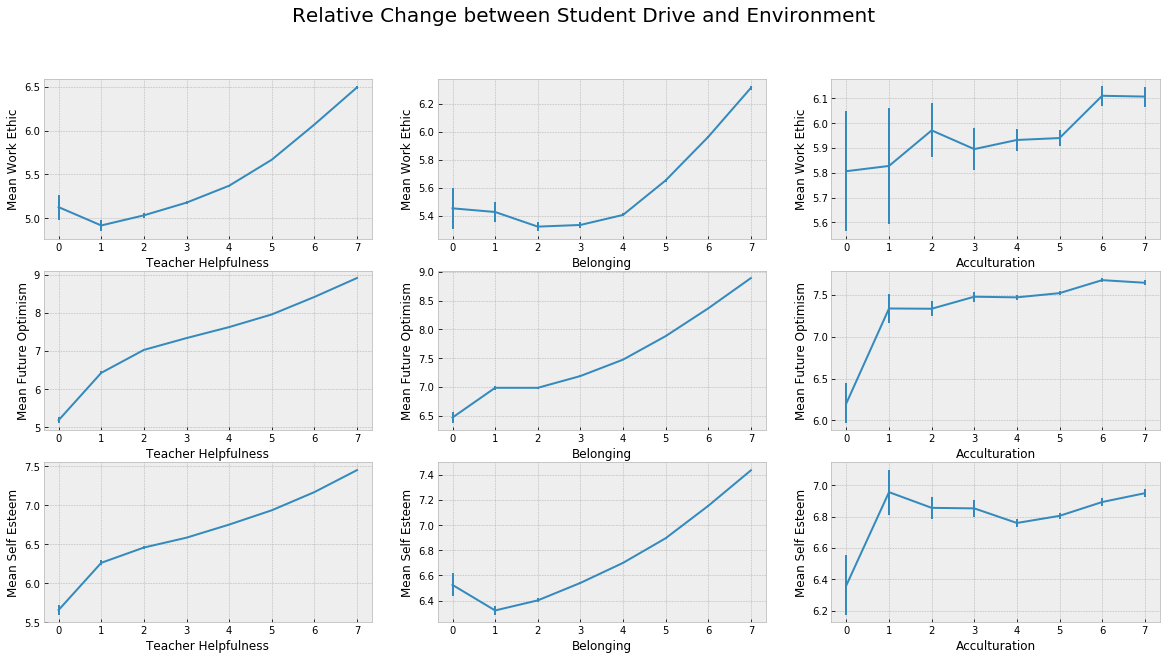

In [470]:
generate_line_plots(df, environment, student_drive, 0.1)
plt.suptitle('Relative Change between Student Drive and Environment', size = 20)
plt.savefig(PATH_BIVARIATE + 'student-environment-line.png')

**Observation 1**: To make a generalized statement, it appears that ***all environment variables depict a positive correlation with student drive variables.*** However, the trends for each plot are slightly different. 

**Observation 2**: All student drive variables paired with ***belonging*** and ***teacher helpfulness*** on the x-axis depict a slight exponential trend, with either a peak or a trough around Belonging = 1 or 2.

**Observation 3**: All student drive variables paired with ***acculturation*** on the x-axis depict irregular yet overall positive trends. There is much more variability for student drive variables associated with acculturation, which implies that ***acculturation is not a very stable or reliable environment variable to draw strong conclusions from.***

### Academic Performance vs. Environment

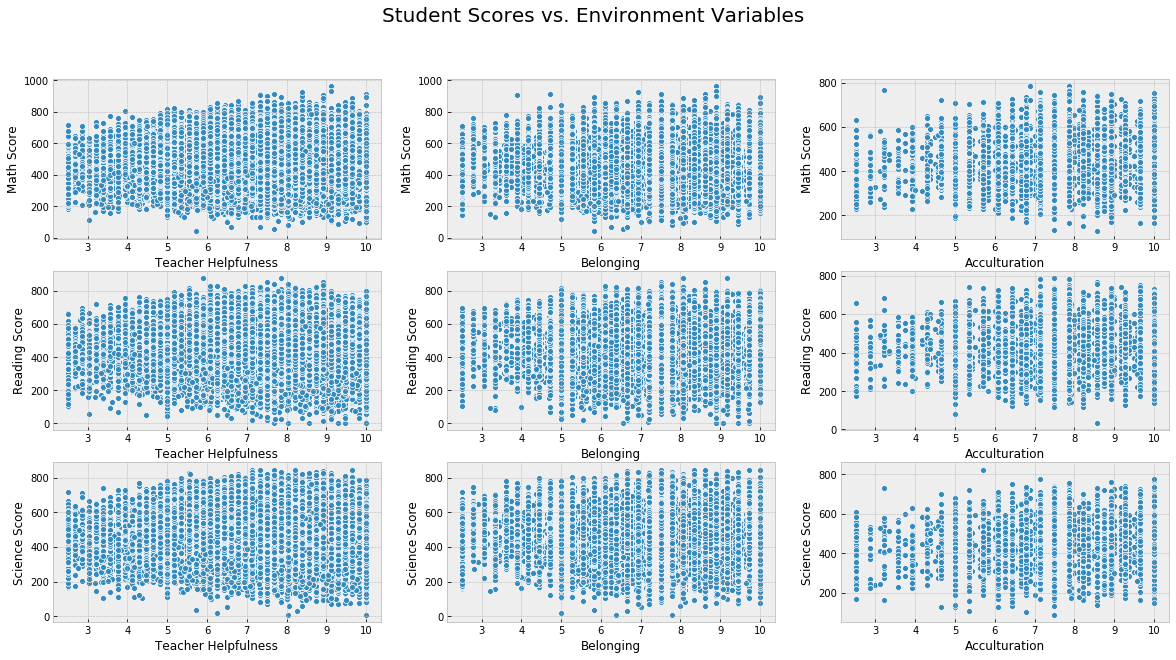

In [471]:
generate_scatterplots(df, environment, scores)
plt.suptitle('Student Scores vs. Environment Variables', size = 20)
plt.savefig(PATH_BIVARIATE + 'scores-environment-scatter.png')

**Observation**: Again, there is a big problem with overplotting. Let us create line plots once more:

* **Note for future exploration:** Do not use scatterplots!

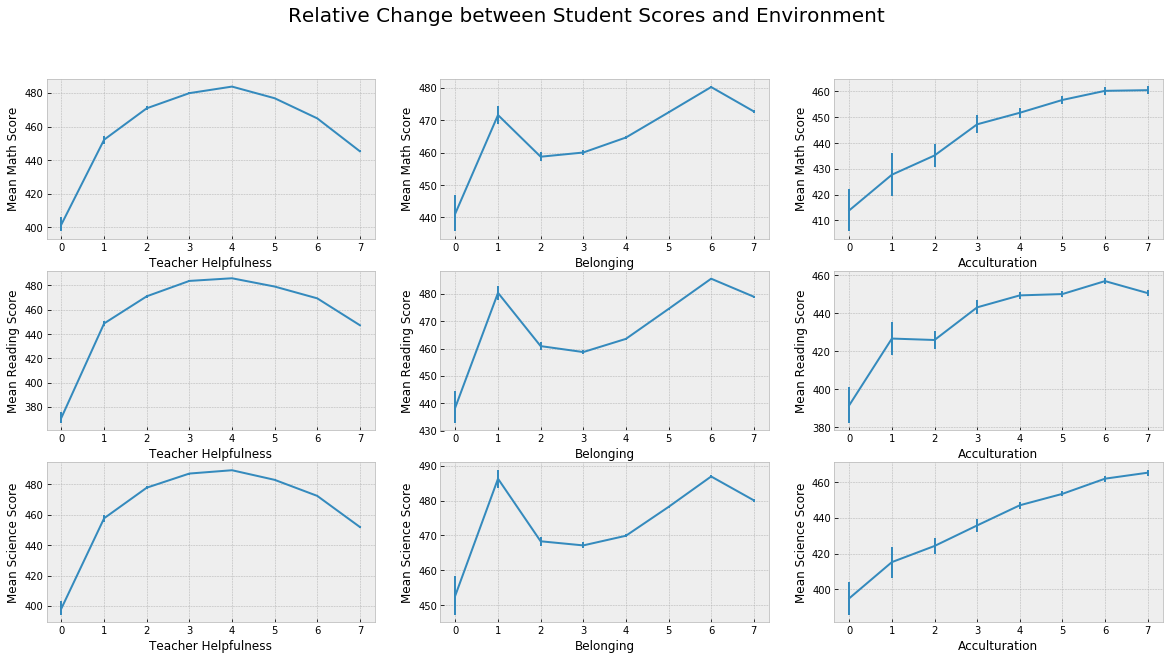

In [472]:
generate_line_plots(df, environment, scores, 0.1)
plt.suptitle('Relative Change between Student Scores and Environment', size = 20)
plt.savefig(PATH_BIVARIATE + 'scores-environment-line.png')

**Observation 1:** Scores paired with environment variables **depict much more consistent trends** unlike the previous student drive vs. environment variables.

**Observation 2:** Teacher helpfulness trends paired with scores depict a positive parabolic trend. However, it is interesting to note that ***mean scores peak at a teacher helpfulness score around 4, which is counterintuitive.*** Before 4, a higher teacher helpfulness is likely to yield higher scores; the opposite is true after x = 4.

**Observation 3:** Trends for sense of belonging and scores are the most irregular ones out of these 9 line plots. ***Mean scores increase between x = 0 and x = 1, then x = 3 and x = 6***. The peaks are at x = 1 and x = 6.

**Observation 4:** Trends for acculturation and scores are the most normal and predictable. ***Trends are clearly positively correlated, with the only downside being much more variability at each mean score.*** However, since the variability depicted in these line plots are not as dramatic as the ones portrayed in the previous set of 9 plots, it is sensible to ignore them. However, we must still be aware and keep them in mind.

In [46]:
def generate_box_plots(df, num_list, cat_list, order):
    fig, ax = plt.subplots(len(num_list), len(cat_list), figsize = [20, 10])
    ax = ax.flatten()
    j = 0
    k = 0
    
    for i in range(len(num_list) * len(cat_list)):
        plt.subplot(len(num_list), len(cat_list), i + 1)
        if (i == 3 or i == 6):
            j = 0
            k += 1
        temp = df[~df[num_list[j]].isna() & ~df[cat_list[k]].isna()]
        if (order == True):
            cat_order = df.groupby(cat_list[k]).median()[num_list[j]].sort_values(ascending = False).index[:5]
            sb.boxplot(data = temp, y = cat_list[k], x = num_list[j], order = cat_order)
#         sb.swarmplot(data = df, y = cat_list[k], x = num_list[j])
        else:
            sb.boxplot(data = temp, y = cat_list[k], x = num_list[j])
        
        plt.ylabel(cat_list[k].title().replace('_', ' '), size = 10)
        plt.xlabel(num_list[j].title().replace('_', ' '), size = 10)
        
        j += 1

### Student Drive vs. Background

**Student Drive vs. Country**

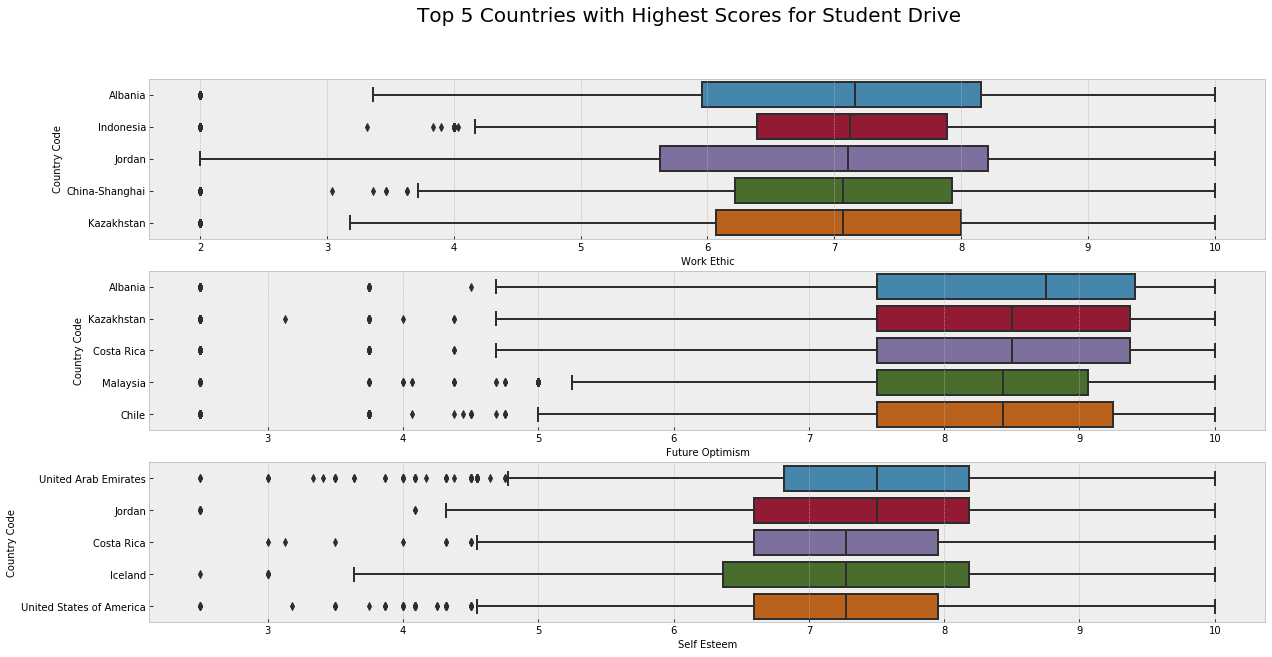

In [473]:
generate_box_plots(df, student_drive, ['country_code'], True)
plt.suptitle('Top 5 Countries with Highest Scores for Student Drive', size = 20)
plt.savefig(PATH_BIVARIATE + 'drive-country.png')

**Observation 1:** Students in Albania tend to have the highest work ethic and future optimism, but do not appear anywhere in the top 5 in terms of self-esteem. ***Question 1: Where does Albania fall under self-esteem?***

**Observation 2:** Students in the United Arab Emirates tend to have higher rates of self-esteem, yet do not appear anywhere in the top 5 in terms of work ethic or future optimism. ***Question 2: Does high self-image but lack of work ethic or future optimism affect UAE students' test scores?***

- Question 2 will be explored later on.

**Observation 3:** Overall, students tend to have ***higher rates for future optimism than both work ethic and self-esteem.*** When looking at the medians for Future Optimism, they are all greater than the medians for both self-esteem and work-ethic. In fact, ***all other medians' 75th quartile scores are still lesser than the medians for future optimism.***


### Where does Albania fall under self-esteem?

In [294]:
ranked_countries_self_esteem = df.groupby('country_code').median().self_esteem.sort_values(ascending = False).index.values
place = np.where(ranked_countries_self_esteem == 'Albania')[0][0]
print('Albania falls under {}th in terms of self-esteem.'.format(place))

Albania falls under 19th in terms of self-esteem.


***Albania ranks 19th place in terms of self-esteem. It is not in the top 5, but it is in the top 20.*** Therefore, of the students who answered the environment variables, students in Albania tend to be more work- and future-oriented.

### But what about Mexico, the most frequently occurring country? Where does it fall under student drive factors?

In [295]:
ranked_countries_work_ethic = df.groupby('country_code').median().work_ethic.sort_values(ascending = False).index.values
ranked_countries_future_optimism = df.groupby('country_code').median().future_optimism.sort_values(ascending = False).index.values

In [296]:
mex_place_work_ethic = np.where(ranked_countries_work_ethic == 'Mexico')[0][0]
mex_place_future_optimism = np.where(ranked_countries_future_optimism == 'Mexico')[0][0]
mex_place_self_esteem = np.where(ranked_countries_self_esteem == 'Mexico')[0][0]

In [563]:
statement = 'Mexico falls under {}th place in terms of {}.'

print(statement.format(mex_place_work_ethic, 'work ethic'))
print(statement.format(mex_place_future_optimism, 'future optimism'))
print(statement.format(mex_place_self_esteem, 'self esteem'))

Mexico falls under 14th place in terms of work ethic.
Mexico falls under 9th place in terms of future optimism.
Mexico falls under 16th place in terms of self esteem.


**Of the 3 environment variables, Mexico ranks highest for future optimism and least for self-esteem.**

***This means that of the students who answered the environment variable questions, students in Mexico tend to be more optimistic. In any case, however, Mexico still ranks in the top 20 for all environment variables.***

**Student Drive vs. Gender**

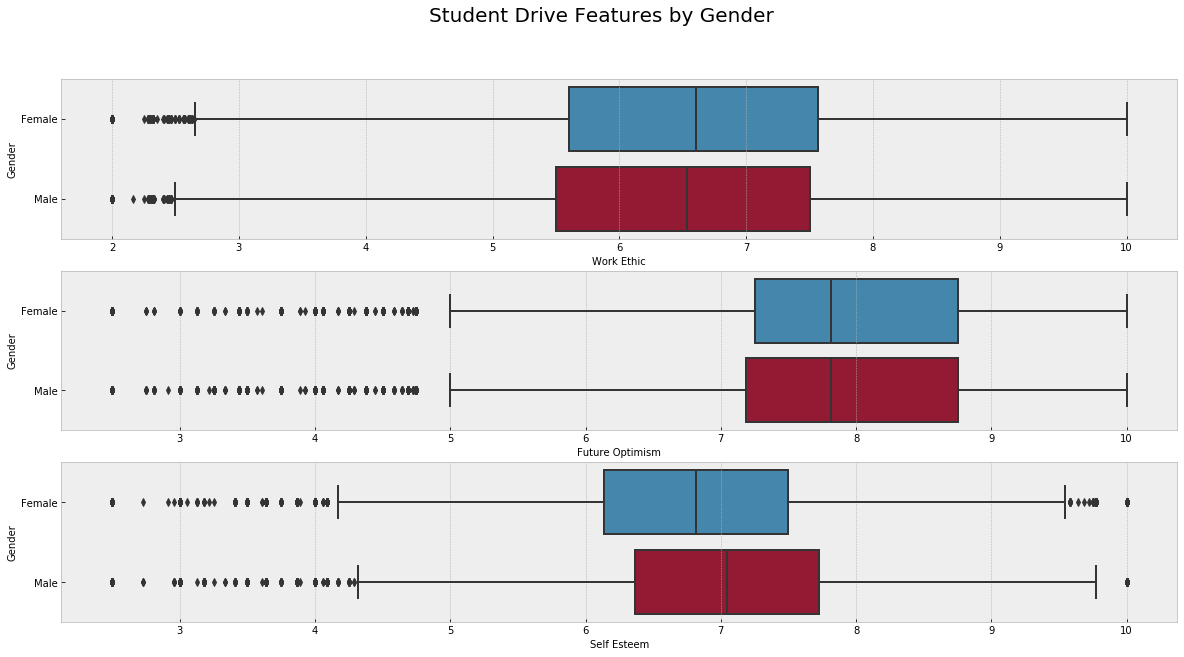

In [474]:
generate_box_plots(df, student_drive, ['gender'], False)
plt.suptitle('Student Drive Features by Gender', size = 20)
plt.savefig(PATH_BIVARIATE + 'drive-gender.png')

**Observation 1:** Girls tend to have a higher work ethic but ***significantly less self-esteem*** than boys. Meanwhile, there is no gender gap for future optimism. This is a key takeaway as this discovery reflects the reality that girls are often discouraged and intimidated in academic settings, despite putting more effort.

**Parent Occupation by Student Drive**

In [53]:
parent_occupation = ['mother_occupation', 'father_occupation']

Text(0.5, 0.98, 'Top 5 Mother Occupations with Highest Score for Student Drive')

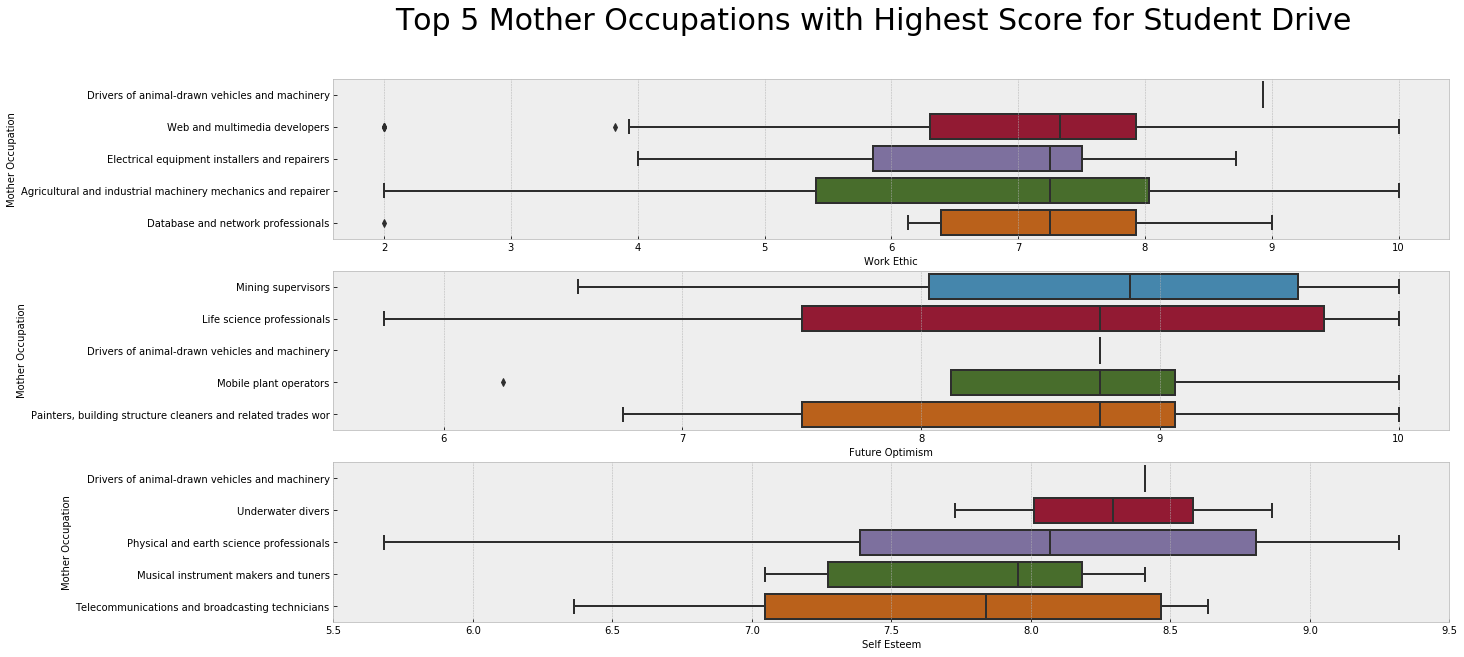

In [475]:
generate_box_plots(df, student_drive, ['mother_occupation'], True)
plt.suptitle('Top 5 Mother Occupations with Highest Score for Student Drive', size = 30)
# plt.savefig(PATH_BIVARIATE + 'drive-m-occ.png')

### Mothers who work as drivers of animal-drawn vehicles and machinery do not appear to have an IQR or a range. Perhaps there is only a singular value recorded for this occupation - let's check.

In [301]:
num_driver = df.mother_occupation.value_counts()['Drivers of animal-drawn vehicles and machinery']
print('There is {} recorded value for "Drivers of animal-drawn vehicles and machinery" under mother_occupation.'.format(num_driver))

There is 1 recorded value for "Drivers of animal-drawn vehicles and machinery" under mother_occupation.


My assumption was correct. ***Since "Drivers of animal-drawn vehicles and machinery" is an outlier, let us redo the above graphs without this outlier.***

In [303]:
#remove "Drivers of animal-drawn vehicles and machinery" under mother_occupation
to_drop = 'Drivers of animal-drawn vehicles and machinery'
df_mo = df.drop(df[df.mother_occupation == to_drop].index)

In [308]:
#verify value does not exist
df_mo[df_mo['mother_occupation'] == to_drop].any().mother_occupation

False

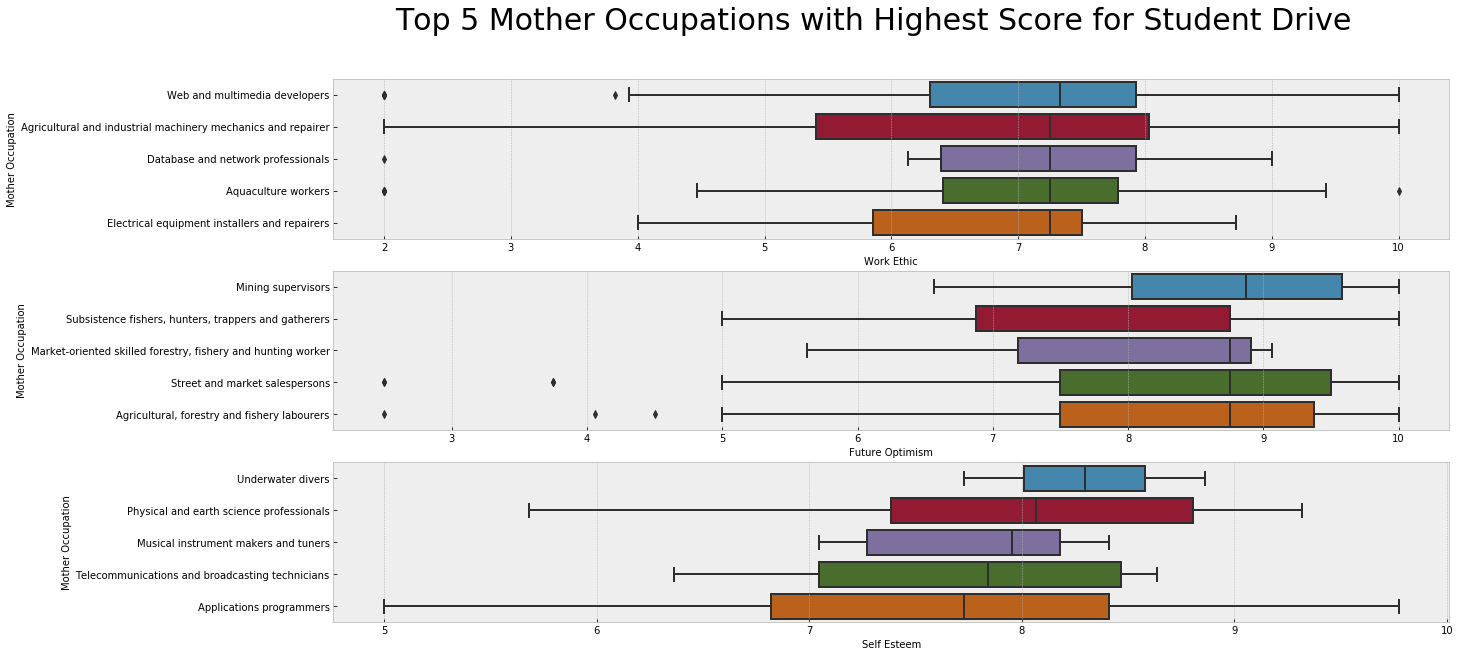

In [476]:
generate_box_plots(df_mo, student_drive, ['mother_occupation'], True)
plt.suptitle('Top 5 Mother Occupations with Highest Score for Student Drive', size = 30)
plt.savefig(PATH_BIVARIATE + 'drive-m-occ.png')

**Observation 1:** I am noticing that ***future optimism tends to score higher than all other environment variables.*** Just like these environment variables previously correlated to gender and student drive, the medians for future optimism outnumber even the interquartile ends of the other variables.

**Observation 2:** Of the students who answered these questions, ***there is a good variety of mother occupations for students with a high work ethic.*** Therefore, no singular conclusion can be drawn for work ethic.

**Observation 3:** Of the students who answered these questions, ***students whose mothers work a blue-collar job tend to have the highest rates of optimism for their future.***

**Observation 4:** Of the students who answered these questions, ***students whose mothers work in a STEM field (with music makers/tuners as an exception) tend to have the highest rates of self-esteem.***

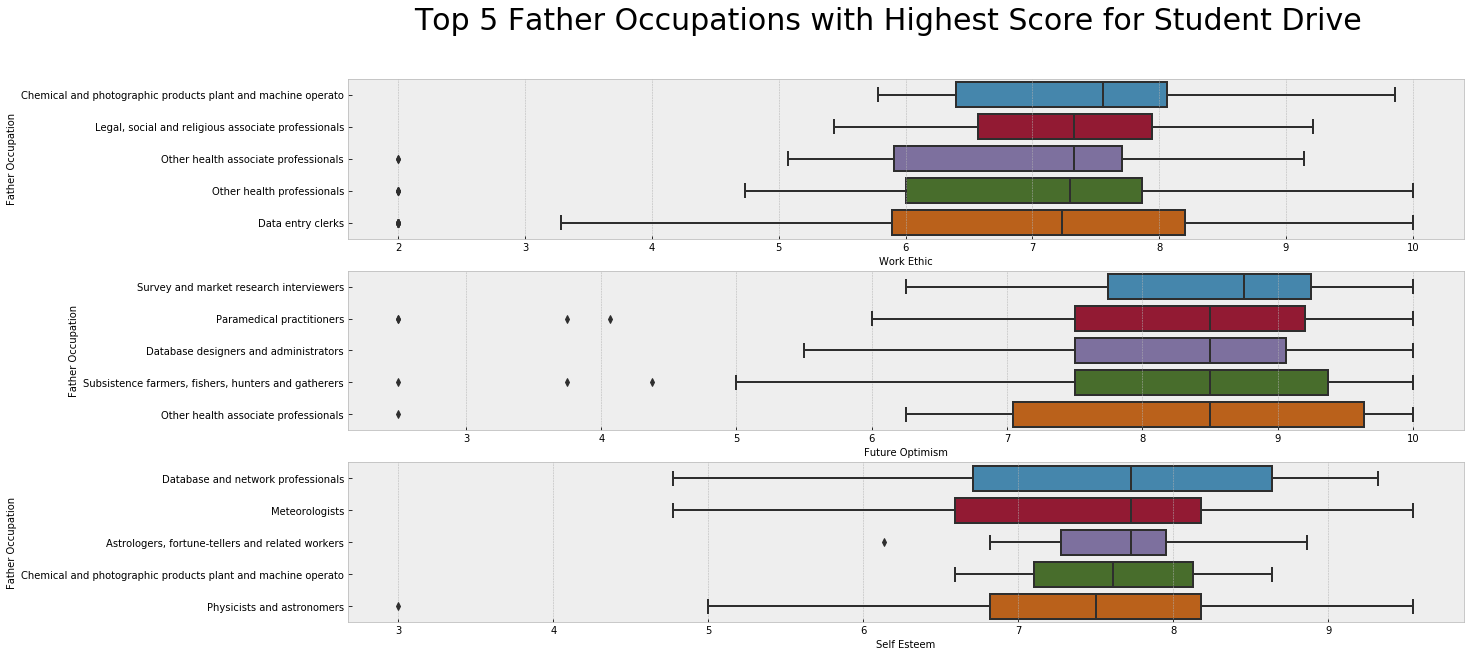

In [477]:
generate_box_plots(df, student_drive, ['father_occupation'], True)
plt.suptitle('Top 5 Father Occupations with Highest Score for Student Drive', size = 30)
plt.savefig(PATH_BIVARIATE + 'drive-f-occ.png')

**Observation 1:** White-collar jobs dominate the top 5 father profession jobs for the highest scores of all environment variables with the exception of "Subsistence farmers, fishes, hunters, and gatherers."

**Observation 2:** Future optimism, again, scores much higher on average than self-esteem or work ethic. 

**Student Drive vs. Mother Immigrant**

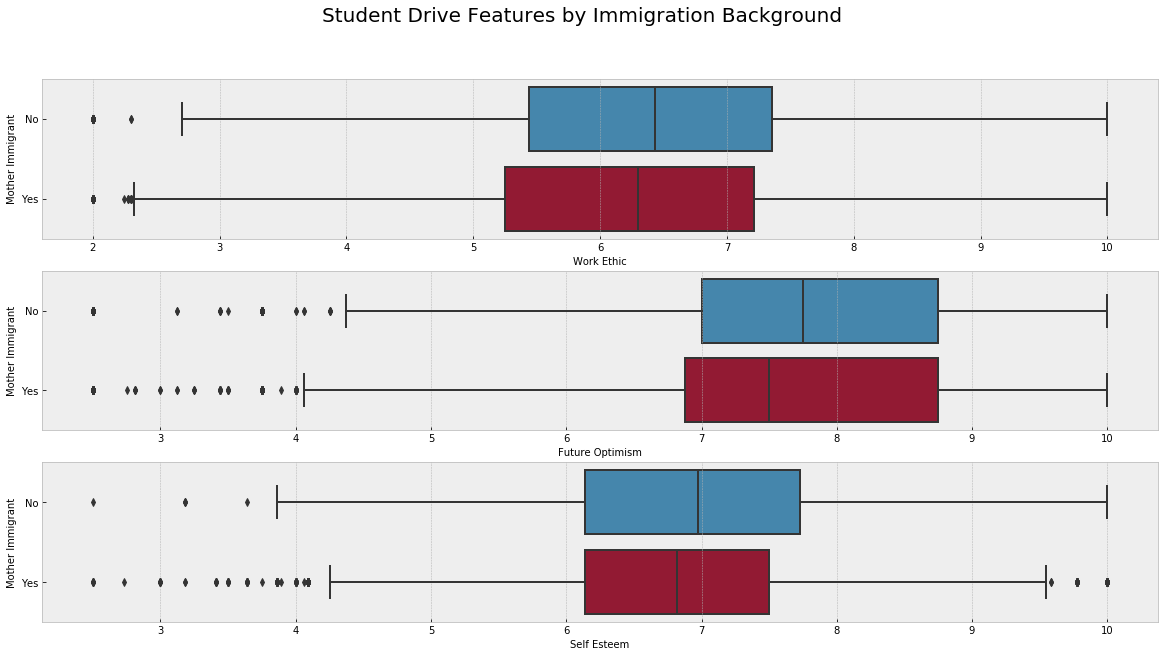

In [478]:
generate_box_plots(df, student_drive, ['mother_immigrant'], True)
plt.suptitle('Student Drive Features by Immigration Background', size = 20)
plt.savefig(PATH_BIVARIATE + 'drive-m-immigrant.png')

**Observation 1:** Students who do not come from an immigrant background tend to score higher on all environment variables than those who do. This is intuitive enough, as I would assume non-immigrants are much more familiar with their country of citizenship, and thus would adapt better.

**Observation 2:** Again, future optimism scores higher on average for all environment variables in comparison to work ethic and self esteem.

### Academic Performance vs. Background

**Country vs. Scores**

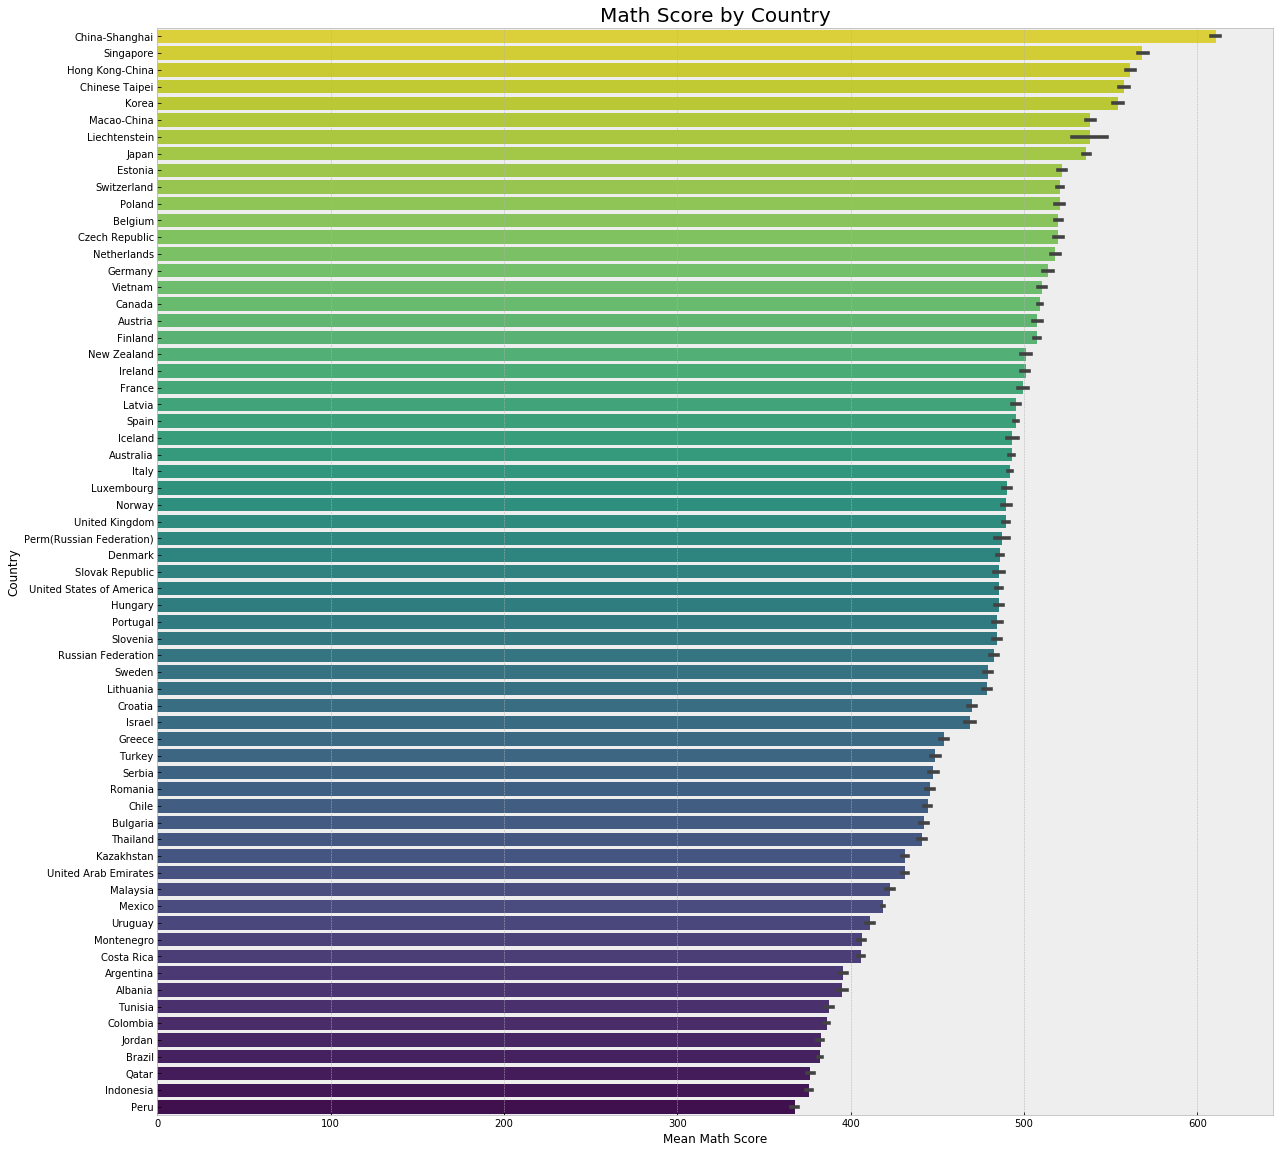

In [479]:
plt.figure(figsize = [20, 20])
order = df.groupby('country_code').mean().math_score.sort_values(ascending = False).index
sb.barplot(data = df, y = 'country_code', x = 'math_score', palette = 'viridis_r', order = order)
plt.xlabel('Mean Math Score')
plt.ylabel('Country')
plt.title('Math Score by Country', size = 20)
plt.savefig(PATH_BIVARIATE + 'math-score-country.png')

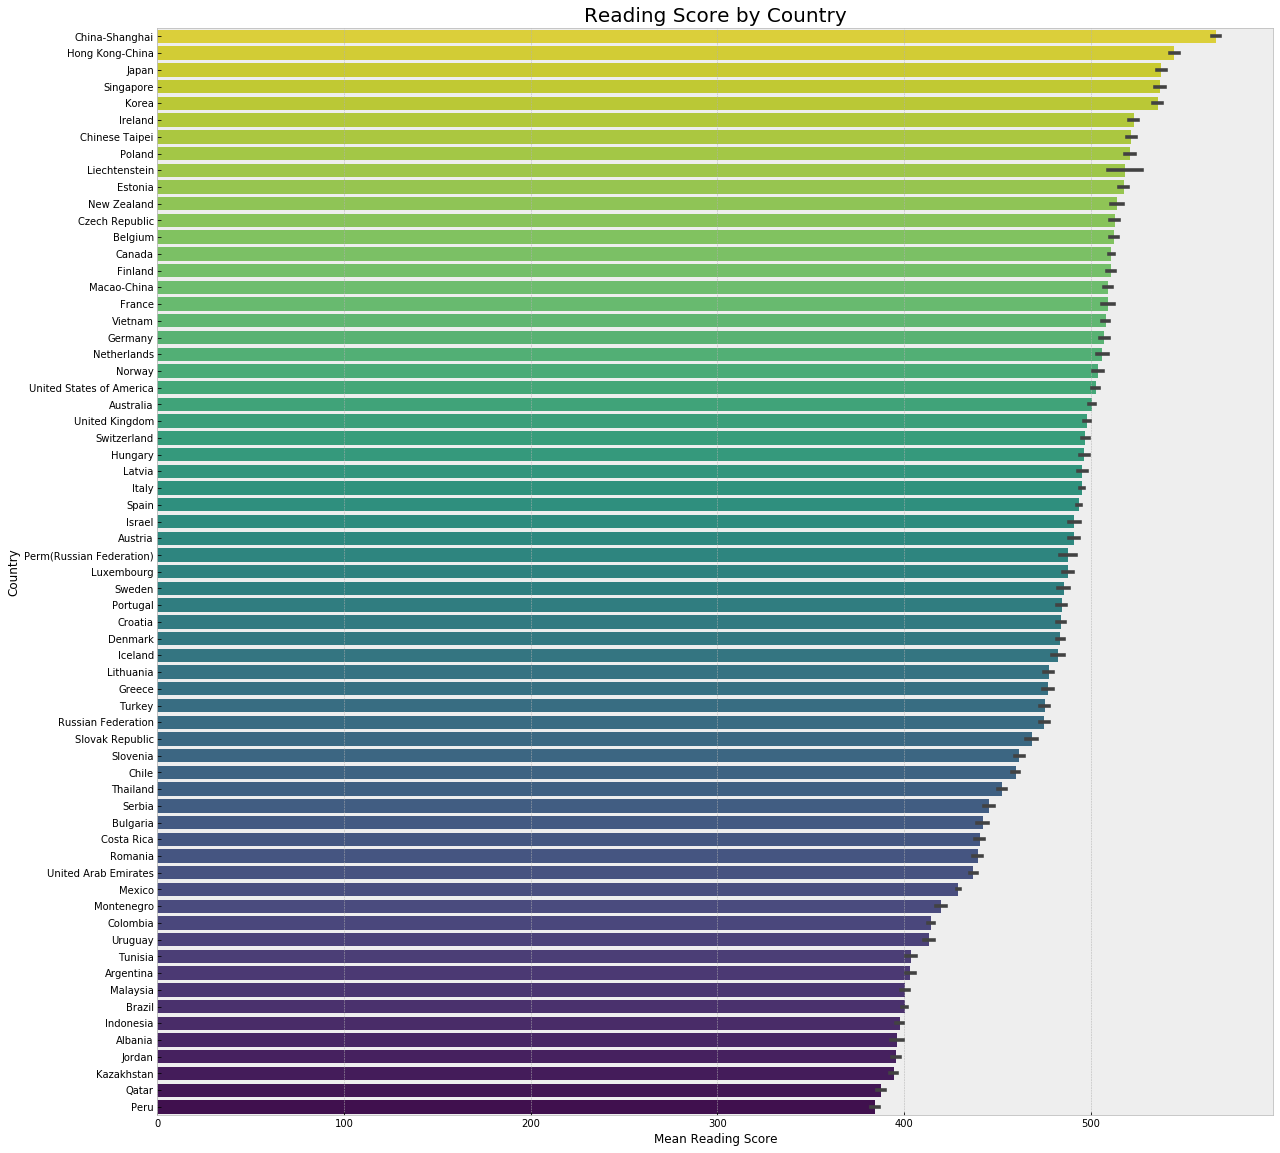

In [480]:
plt.figure(figsize = [20, 20])
order = df.groupby('country_code').mean().reading_score.sort_values(ascending = False).index
sb.barplot(data = df, y = 'country_code', x = 'reading_score', palette = 'viridis_r', order = order)
plt.xlabel('Mean Reading Score')
plt.ylabel('Country')
plt.title('Reading Score by Country', size = 20)
plt.savefig(PATH_BIVARIATE + 'reading-score-country.png')

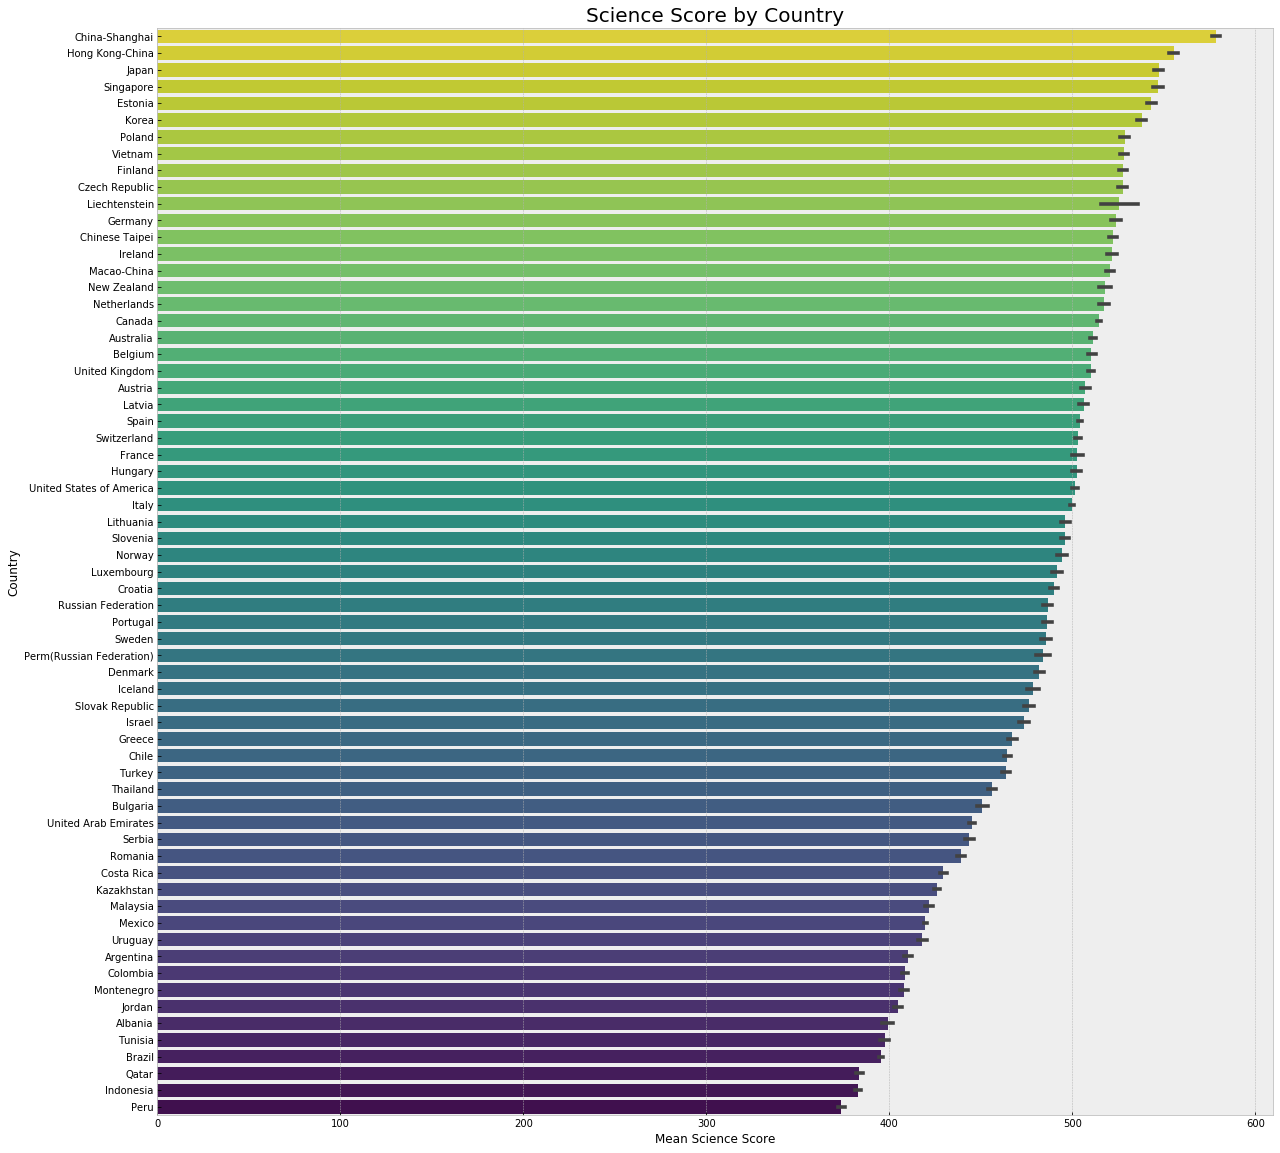

In [481]:
plt.figure(figsize = [20, 20])
order = df.groupby('country_code').mean().science_score.sort_values(ascending = False).index
sb.barplot(data = df, y = 'country_code', x = 'science_score', palette = 'viridis_r', order = order)
plt.xlabel('Mean Science Score')
plt.ylabel('Country')
plt.title('Science Score by Country', size = 20)
plt.savefig(PATH_BIVARIATE + 'science-score-country.png')

**Observation 1:** Students in Shanghai, China students dominate all other countries when it comes to having the highest mean math, reading, AND science scores.

**Observation 2:** East Asian countries score in the top 5 highest math, reading, and science scores, with the exception of Estonia at #5 for science scores.

**Observation 3:** Students in Peru consistently scored the global lowest in scores among math, reading, and science scores.

### Does high self-image but lack of work ethic or future optimism affect UAE students' test scores?

> Yes. Although students in the UAE do not score the lowest in terms of math, reading, or science, the UAE consistently appears in the bottom 15 countries with the lowest mean scores. This intuitively proves correct in that ***a lower work ethic tends to result in lower test scores***, and that likely has nothing to do with self-esteem levels.

**Gender vs. Scores**

In [161]:
def create_hist_box(df, num_var, cat_var, val1, val2, binsize):
    bins = np.arange(0, df[num_var].max() + binsize, binsize)
    fig = plt.subplots(1, 2, figsize = [15, 5])
    
    plt.subplot(1, 2, 1)
    sb.boxplot(data = df, y = cat_var, x = num_var)
    plt.xlabel(num_var.title().replace('_', ' '))
    plt.ylabel(cat_var.title().replace('_', ' '))
    
    plt.subplot(1, 2, 2)
    plt.hist(data = df[df[cat_var] == val1], x = num_var, alpha = .4, bins = bins, label = val1)
    plt.hist(data = df[df[cat_var] == val2], x = num_var, alpha = .4, bins = bins, label = val2)
    plt.xlabel(num_var.title().replace('_', ' '))
    plt.ylabel('Count')
    plt.legend()

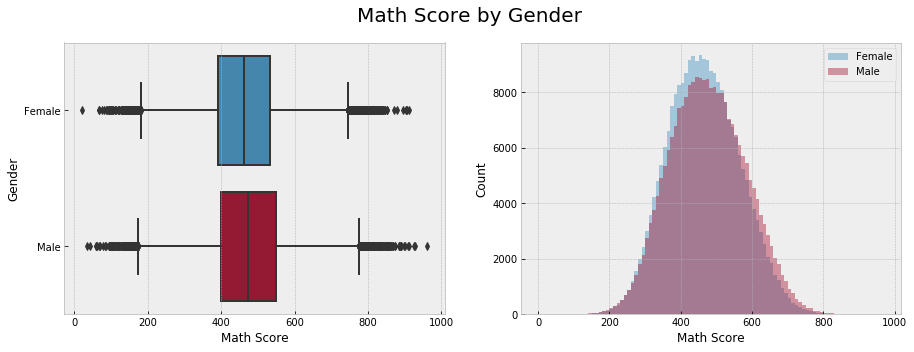

In [482]:
create_hist_box(df, 'math_score', 'gender', 'Female', 'Male', 10)
plt.suptitle('Math Score by Gender', size = 20)
plt.savefig(PATH_BIVARIATE + 'math-score-gender.png')

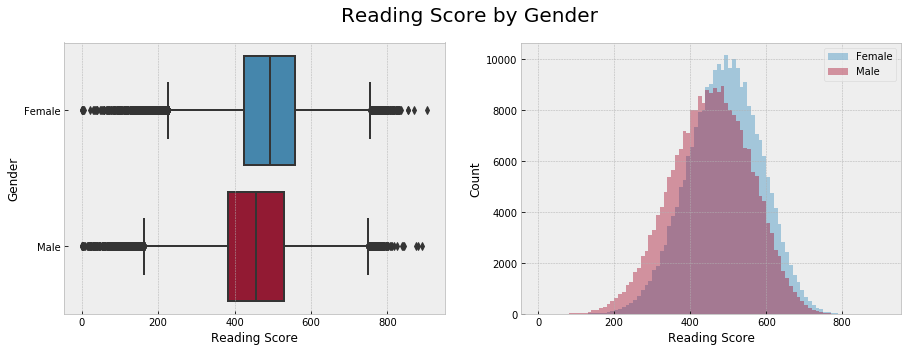

In [483]:
create_hist_box(df, 'reading_score', 'gender', 'Female', 'Male', 10)
plt.suptitle('Reading Score by Gender', size = 20)
plt.savefig(PATH_BIVARIATE + 'reading-score-gender.png')

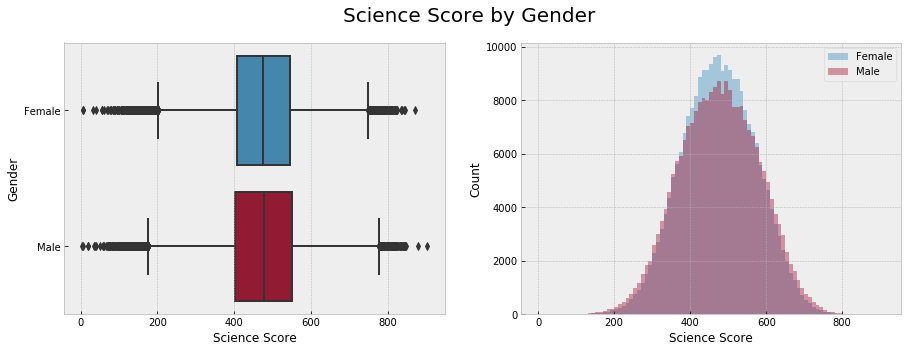

In [484]:
create_hist_box(df, 'science_score', 'gender', 'Female', 'Male', 10)
plt.suptitle('Science Score by Gender', size = 20)
plt.savefig(PATH_BIVARIATE + 'science-score-gender.png')

***Unlike analyzing the `mother_immigrant` variable, the count in genders is evenly split, so we can draw reliable conclusions from the histograms.***

**The patterns in the histograms show that *more girls score the average score than boys.***

**Observation 1:** Under math and science scores, more girls than boys scored around 500.

**Observation 2:** Under reading scores, more boys than girls score between 0 - 500, but more girls than boys score between 500 - 800. 

**Observation 3:** The only truly notable difference in the gender gap is under ***reading score, where girls outperform boys on average.***

> **Question 3:** Is this outperformance in reading scores due to girls' higher work ethic? What about the other scores?

**Parent Occupation vs. Scores**

In [138]:
def generate_parent_occ_plots(num_var):
    fig = plt.subplots(1, 2, figsize = [15, 10])
    
    #mother occupation
    plt.subplot(2, 1, 1)
    order = df.groupby('mother_occupation').mean()[num_var].sort_values(ascending = False).index[:5]
    sb.barplot(data = df, y = 'mother_occupation', x = num_var, palette = 'viridis_r', order = order)
    plt.xlabel('Mean ' + num_var.title().replace('_', ' '))
    plt.ylabel('Mother Occupation')
    
    #father occupation
    plt.subplot(2, 1, 2)
    order = df.groupby('father_occupation').mean()[num_var].sort_values(ascending = False).index[:5]
    sb.barplot(data = df, y = 'father_occupation', x = num_var, palette = 'viridis_r', order = order)
    plt.xlabel('Mean ' + num_var.title().replace('_', ' '))
    plt.ylabel('Father Occupation')

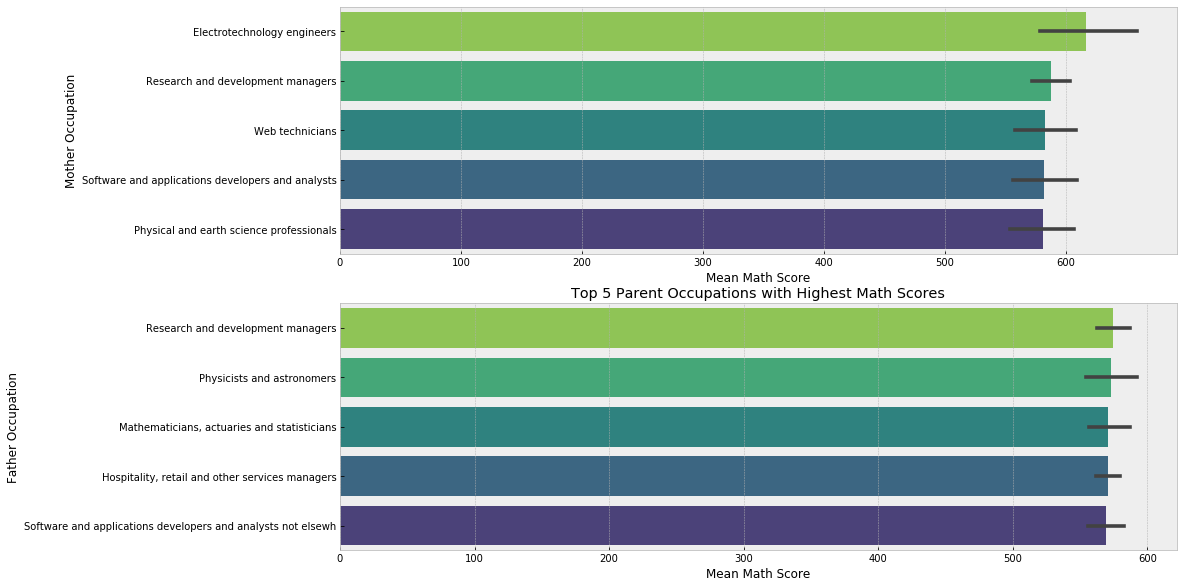

In [485]:
generate_parent_occ_plots('math_score')
plt.title('Top 5 Parent Occupations with Highest Math Scores')
plt.savefig(PATH_BIVARIATE + 'parent-occ-math.png')

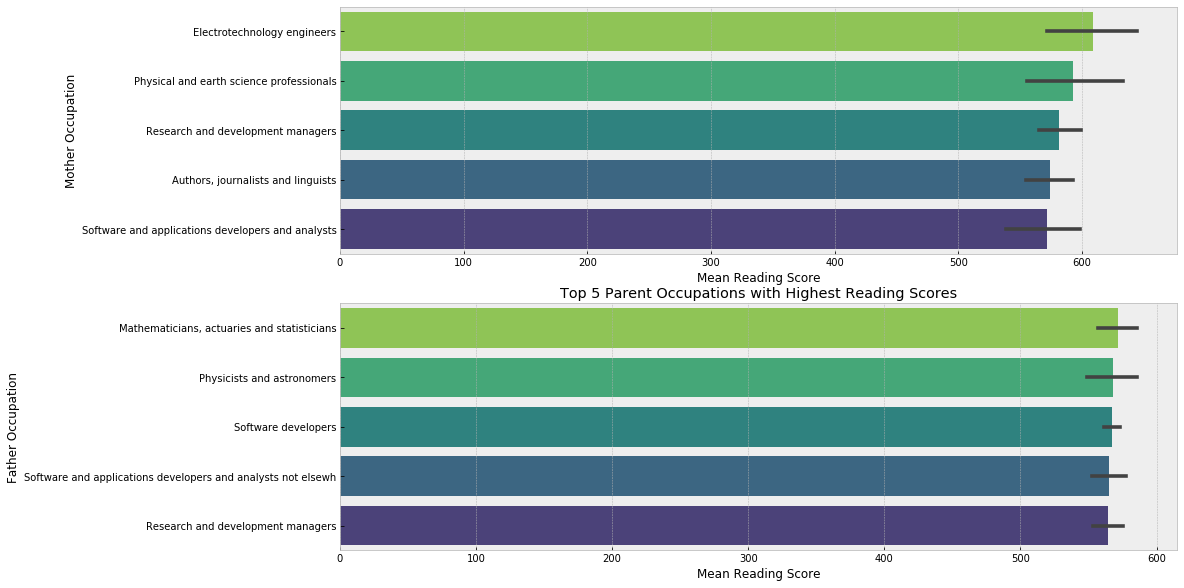

In [486]:
generate_parent_occ_plots('reading_score')
plt.title('Top 5 Parent Occupations with Highest Reading Scores')
plt.savefig(PATH_BIVARIATE + 'parent-occ-reading.png')

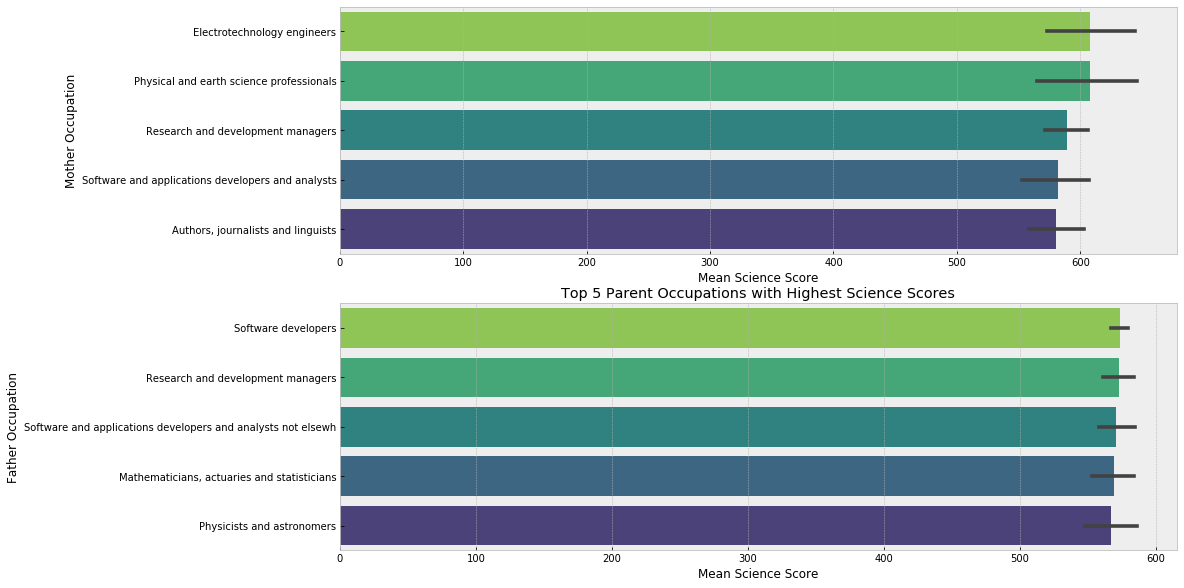

In [487]:
generate_parent_occ_plots('science_score')
plt.title('Top 5 Parent Occupations with Highest Science Scores')
plt.savefig(PATH_BIVARIATE + 'parent-occ-science.png')

**Observation:** All parent occupations show ***consistency that students with parents who work in STEM and/or other white collar jobs tend to exclusively score the highest for math, reading, and science.***

**Mother Immigrant vs. Scores**

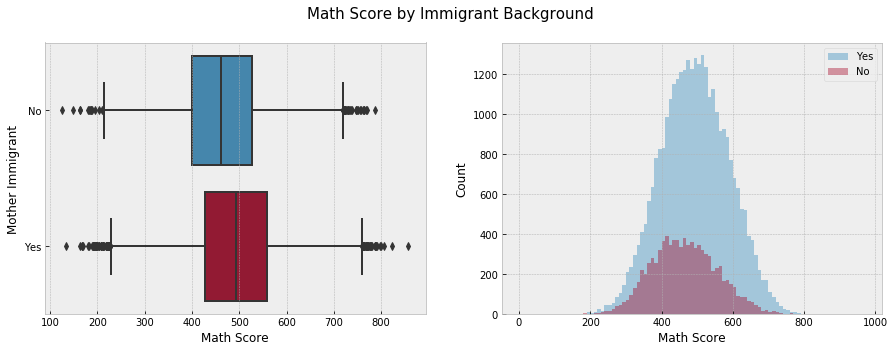

In [488]:
create_hist_box(df, 'math_score', 'mother_immigrant', 'Yes', 'No', 10)
plt.suptitle('Math Score by Immigrant Background', size = 15)
plt.savefig(PATH_BIVARIATE + 'immigrant-math.png')

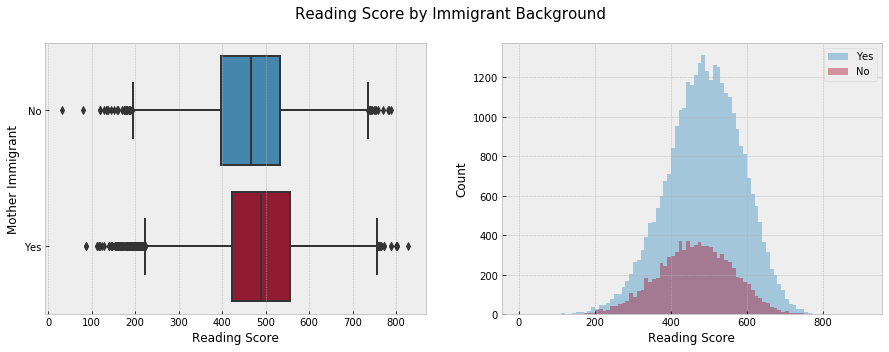

In [489]:
create_hist_box(df, 'reading_score', 'mother_immigrant', 'Yes', 'No', 10)
plt.suptitle('Reading Score by Immigrant Background', size = 15)
plt.savefig(PATH_BIVARIATE + 'immigrant-reading.png')

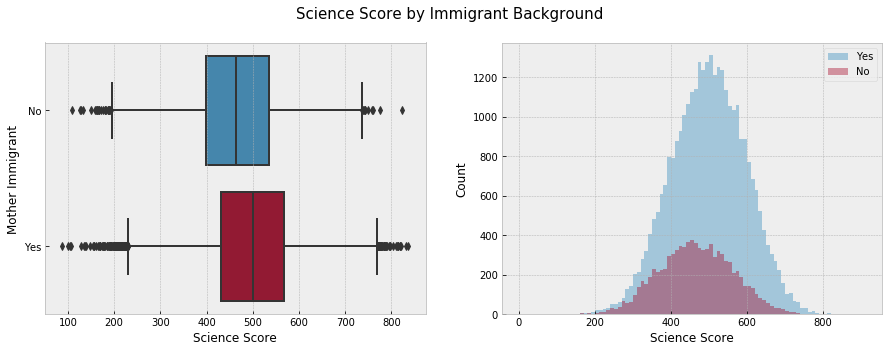

In [490]:
create_hist_box(df, 'science_score', 'mother_immigrant', 'Yes', 'No', 10)
plt.suptitle('Science Score by Immigrant Background', size = 15)
plt.savefig(PATH_BIVARIATE + 'immigrant-science.png')

### Before we go on to make any observations for scores by immigrant background, let's check the ratio of both students who are and aren't from immigrant backgrounds.

In [333]:
(~df.mother_immigrant.isna()).sum()

40721

In [340]:
#get counts of mother immigrant entries
m_imm = df.groupby('mother_immigrant').size()
len_m_imm = (~df.mother_immigrant.isna()).sum()

#calculate percentages
pct_non_imm = (m_imm[0] / len_m_imm) * 100
pct_imm = (m_imm[1] / len_m_imm) * 100

print('There are {} students not from immigrant backgrounds, and {} students who are.'.format(m_imm[0], m_imm[1]))
print('This means {:.2f}% of students are not from immigrants backgrounds, while {:.2f}% are.'.format(pct_non_imm, pct_imm))

There are 9029 students not from immigrant backgrounds, and 31692 students who are.
This means 22.17% of students are not from immigrants backgrounds, while 77.83% are.


***There is a vast disparity in records for students whose mothers aren't or are immigrants. Therefore, we cannot rely on the histogram for sole counts.***

**Observation 1:** As it was previously established, students from immigrant backgrounds score lower for work ethic, future optimism, and self-esteem. However, ***they score consistently higher than students not from an immigrant background.***

This is a key takeaway: **students from immigrant families tend to have more pessimistic views of themselves, but consistently outperform non-immigrant students by a large margin.**

### Other Relationships of Interest
**Mother and Father Occupations in Common**

In [497]:
#isolate the rows where mother and father occuption are equal
temp = df.loc[df.mother_occupation == df.father_occupation]

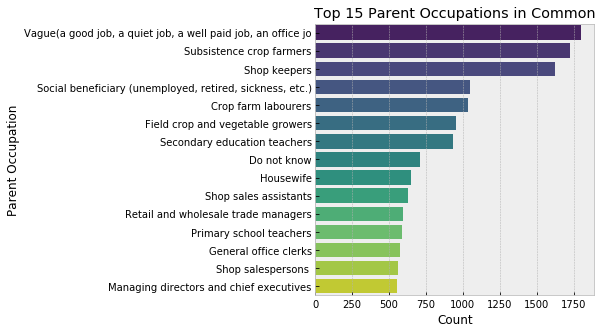

In [498]:
plt.figure(figsize = [5, 5])
order = temp.mother_occupation.value_counts().sort_values(ascending = False).index
sb.countplot(data = temp, y = 'father_occupation', order = order[:15], palette = 'viridis');
plt.ylabel('Parent Occupation')
plt.xlabel('Count')
plt.title('Top 15 Parent Occupations in Common')
plt.savefig(PATH_BIVARIATE + 'parent-occ.png')

### I have just discovered that "Housewife" is recorded under `father_occupation`. But just to double-check, let us verify:

In [366]:
#Check if "Housewife" is under father_occupation
(df.father_occupation == 'Housewife').any()

True

***Yes, 'Housewife' is, in fact, recorded under `father_occupation`.*** This is an interesting case - however, no assumptions can be made about this. Without a doubt, in some families the mother works while the father stays at home, and "Housewife" may have been the only option for students to choose in the questionnaire. In this case, ***I will keep the 'Housewife' record as legitimate, as there are so many recorded instances and family dynamics are diverse and varied.***

**Observation 1:** The top 15 jobs in common shared by both parents for the average student who answered both the Mother and Father Occupations vary. The most common parent occupations in common are a good variety between blue-collar and white-collar jobs.

**Mother Immigrant vs. Acculturation**
> I predict that if a student has an immigrant mother, then they would less likely acclimate well to their host culture. This is because many first-generation immigrant children often do not have a solid headstart familiarity with the country they currently live in. However, I am also aware that a wide variety of third party factors could influence a student to acclimate better to their environment. For example: if they speak the host country's language at a native level, or if their heritage culture is similar or even almost identical to the current culture.

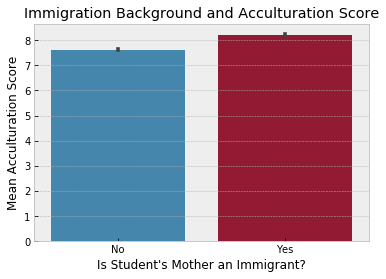

In [502]:
sb.barplot(data = df, x = 'mother_immigrant', y = 'acculturation');
plt.title('Immigration Background and Acculturation Score')
plt.xlabel('Is Student\'s Mother an Immigrant?')
plt.ylabel('Mean Acculturation Score')
plt.savefig(PATH_BIVARIATE + 'acculturation-m-imm.png')

**Observation:** Contrary to my expectations, ***students who come from an immigrant background acclimate better to their environment than students who do not.***

**Question 4:** But are acculturation rates with immigrant background consistent with gender?

### How did the features of interest vary with other features in the dataset?

> **From the above explorations, I have gathered these interesting facts:**

- Students from immigrant families tend to have more pessimistic views of themselves under student drive variables, but consistently outperform non-immigrant students by a large margin. This is a **key takeaway.**
- Female students tend to have a greater work ethic than male students, but a much lower self esteem in comparison.
- Students with mothers who work blue-collar jobs are the most likely to score the worst on math, reading, and science, ***however***, they score higher for work ethic.
- Even though Mexico is the most frequently occurring country, it is in the bottom 15 of countries that scored the worst for math, reading, and science.
- Students with parents who work in STEM and/or other white collar jobs exclusively score the highest for math, reading, and science. You are less likely to score well on tests if your parents hold blue-collar jobs.

### Were there any interesting relationships between the other features (not the main features of interest)?
- Shanghai, China dominates by a large margin every other country when it comes to scores
- Students who come from an immigrant background acclimate better to their environment than students who are not from immigrant backgrounds.

## Multivariate Exploration

**Work Ethic by Self-Esteem by Gender**
> In the previous section, we have established that on average, girls tend to have a much higher work ethic but far less self esteem. Let's look at their relative change for a more complex perspective.

In [28]:
#create grid of line plots
def generate_line_plots(df, x_list, y_list, bin_size):
    fig, ax = plt.subplots(len(y_list), len(x_list), figsize = [20, 10])
    ax = ax.flatten()
    
    j = 0
    k = 0
    
    for i in range(len(y_list) * len(x_list)):
        plt.subplot(len(y_list), len(x_list), i + 1)
        if (i == 3 or i == 6):
            j = 0
            k += 1
        
        bins_e = np.arange(0, df[x_list[j]].max() + bin_size)
        displ_binned = pd.cut(df[x_list[j]], bins_e, include_lowest = True, labels = False)
        comb_mean = df[y_list[k]].groupby(displ_binned).mean()
        comb_std = df[y_list[k]].groupby(displ_binned).std()
        comb_sems = df[y_list[k]].groupby(displ_binned).sem()
        
        difference = len(bins_e) - len(comb_mean)
        bins_c = bins_e[:-difference]
        
        plt.errorbar(x = bins_c, y = comb_mean, yerr = comb_sems)
        plt.xlabel(x_list[j].title().replace('_', ' '))
        plt.ylabel(y_list[k].title().replace('_', ' '))
        
        j += 1

In [373]:
#use line plot to avoid overplotting
def mean_poly(x, y, bins = 10, **kwargs):
    if type(bins) == int:
        bins = np.linspace(x.min(), x.max(), bins + 1)
    bin_centers = (bin_edges[1:] + bin_edges[:-1] / 2)
    
    #compute counts
    data_bins = pd.cut(x, bins, right = False, include_lowest = True, labels = False)
    means = y.groupby(data_bins).mean()
    
    difference = len(bin_edges) - len(means)
    bin_centers = bin_edges[:-difference]
    #create plot
    plt.errorbar(x = bin_centers, y = means, **kwargs)

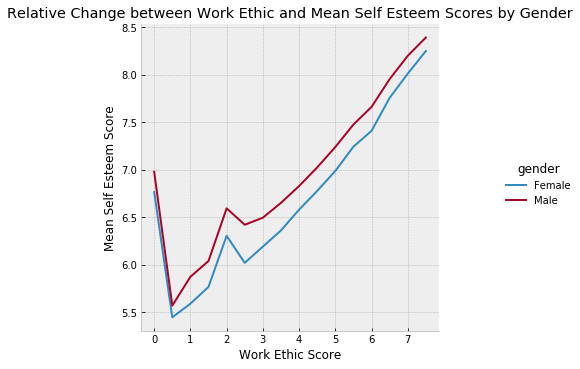

In [503]:
bin_edges = np.arange(0, df.work_ethic.max() + 0.5, 0.5)
g = sb.FacetGrid(data = df, hue = 'gender', height = 5)
g.map(mean_poly, 'work_ethic', 'self_esteem', bins = bin_edges)
g.set_ylabels('Mean Self Esteem Score' )
g.set_xlabels('Work Ethic Score')
plt.title('Relative Change between Work Ethic and Mean Self Esteem Scores by Gender')
g.add_legend();
plt.savefig(PATH_MULTIVARIATE + 'work-ethic-self-esteem-gender.png')

**Observation 1:** There is a dip in students with both a low work ethic score and mean self esteem score, but then linearly increases after a work ethic score of 2.5.

**Observation 2:** There is a ***consistent observation of girls scoring lower than boys for mean self-esteem.***

**Observation 3:** As work ethic score increases, the trends for mean self-esteem score more or less change at the same rate for both genders.

### Question 4: Are Immigration Background & Acculturation Trends consistent with gender?

**Immigration Background by Gender and Acculturation**

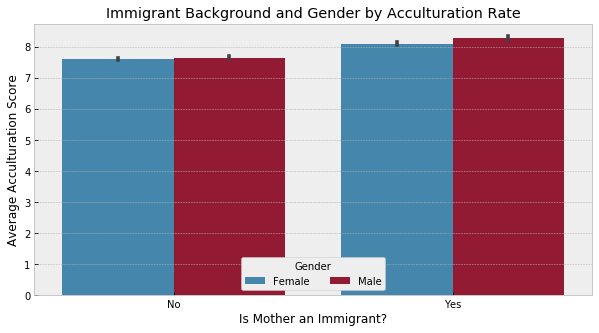

In [504]:
plt.figure(figsize = [10, 5])
ax = sb.barplot(data = df, x = 'mother_immigrant', y = 'acculturation', hue = 'gender')
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'Gender')
plt.title('Immigrant Background and Gender by Acculturation Rate')
plt.xlabel('Is Mother an Immigrant?')
plt.ylabel('Average Acculturation Score')
plt.savefig(PATH_MULTIVARIATE + 'm-imm-acculturation-gender.png')

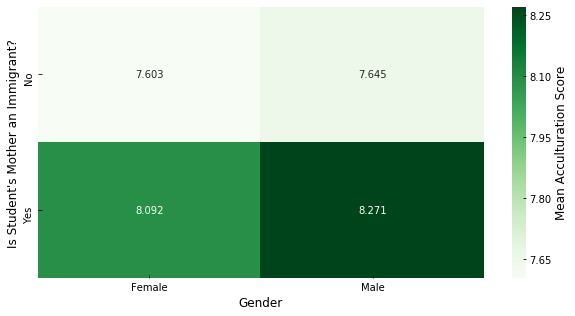

In [505]:
plt.figure(figsize = [10, 5])
cat_means = df.groupby(['gender', 'mother_immigrant']).mean()['acculturation']
cat_means = cat_means.reset_index(name = 'Acculturation Average')
cat_means = cat_means.pivot(index = 'mother_immigrant', columns = 'gender', values = 'Acculturation Average')
sb.heatmap(cat_means, annot = True, fmt = '.3f', cbar_kws = {'label' : 'Mean Acculturation Score'}, cmap = 'Greens')
plt.xlabel('Gender')
plt.ylabel('Is Student\'s Mother an Immigrant?')
plt.savefig(PATH_MULTIVARIATE + 'm-imm-acculturation-gender-heat.png')

**Observation 1**: Yes, the trends are consistent. For both genders, students from immigrant backgrounds tend to score higher than students who do not. 

**Observation 2**: However, the gender gap is slightly more visible: where ***boys tend to be more acclimated to their surroundings than girls.*** This gender gap is more pronounced for students who answered "Yes."

**Scores by Country and Gender**

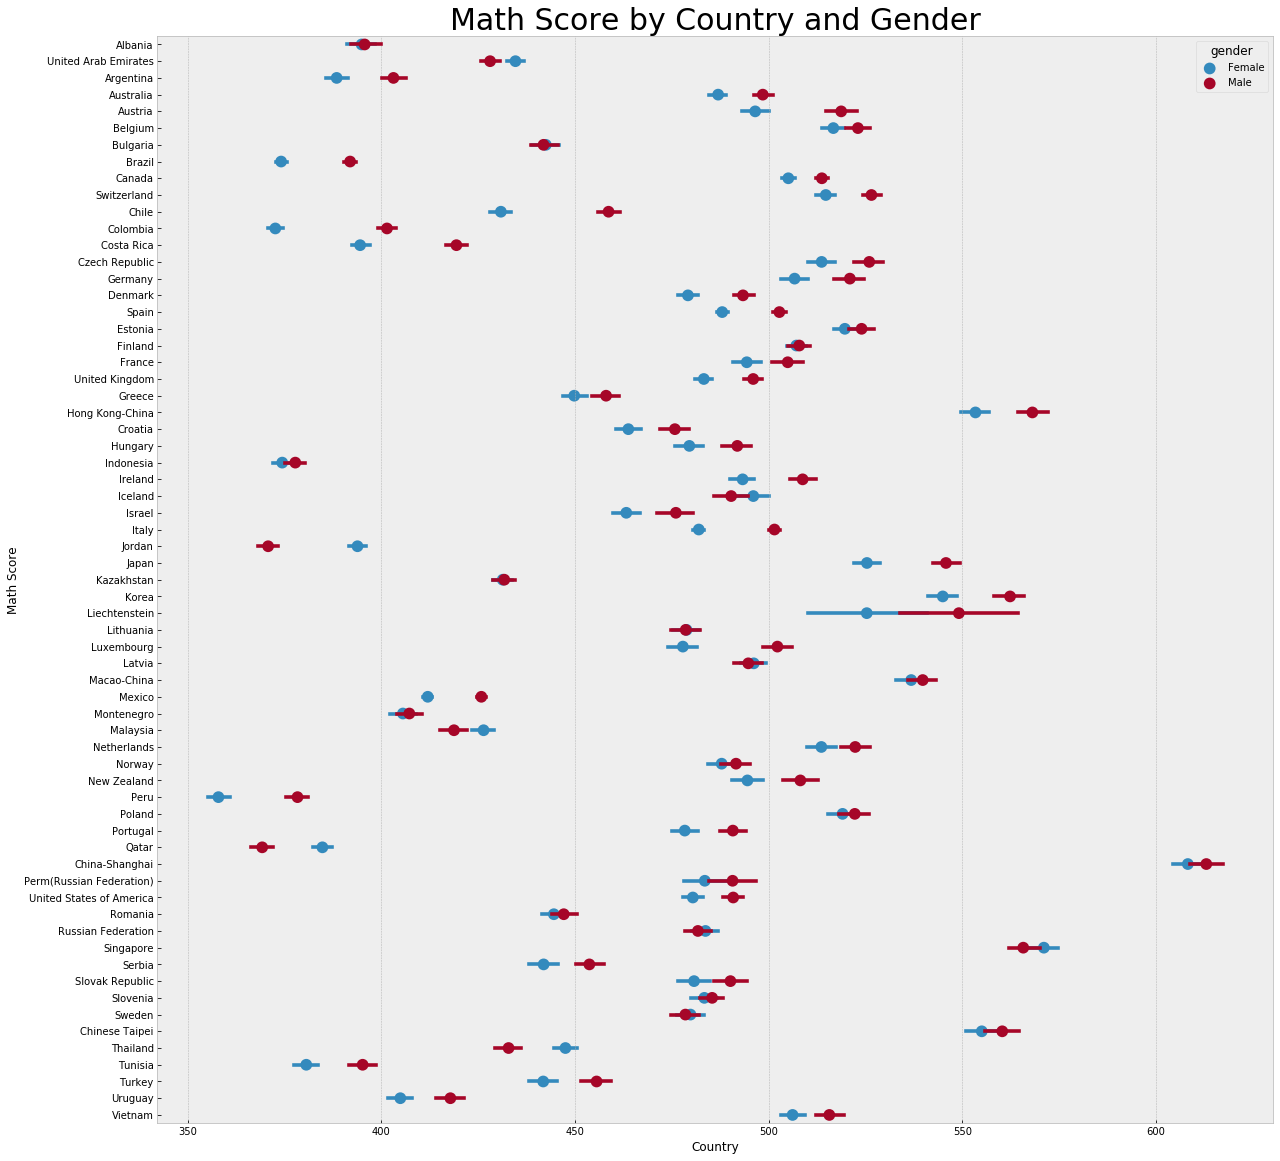

In [506]:
plt.figure(figsize = [20, 20])
ax = sb.pointplot(data = df, y = 'country_code', x = 'math_score', hue = 'gender', linestyles = "")
plt.title('Math Score by Country and Gender', size = 30);
plt.xlabel('Country')
plt.ylabel('Math Score')
plt.savefig(PATH_MULTIVARIATE + 'math-country-gender.png')

**Observation 1**: Boys outperform girls on math scores in the majority of countries. The few countries where girls outperform boys are: United Arab Emirates, Iceland, Jordan, Latvia (by a slight margin), Malaysia, Qatar, Singapore, Russian Federation, Sweden, and Thailand.

**Observation 2**: The countries where girls and boys score about equally on math scores are Albania, Bulgaria, Finland, and Lithuania.

**Observation 3**: The country with the highest amount of variation around their mean math scores per gender is Lithuania.

**Observation 4**: The top-performing country with the highest math scores, China Shanghai, still has boys outperforming girls.

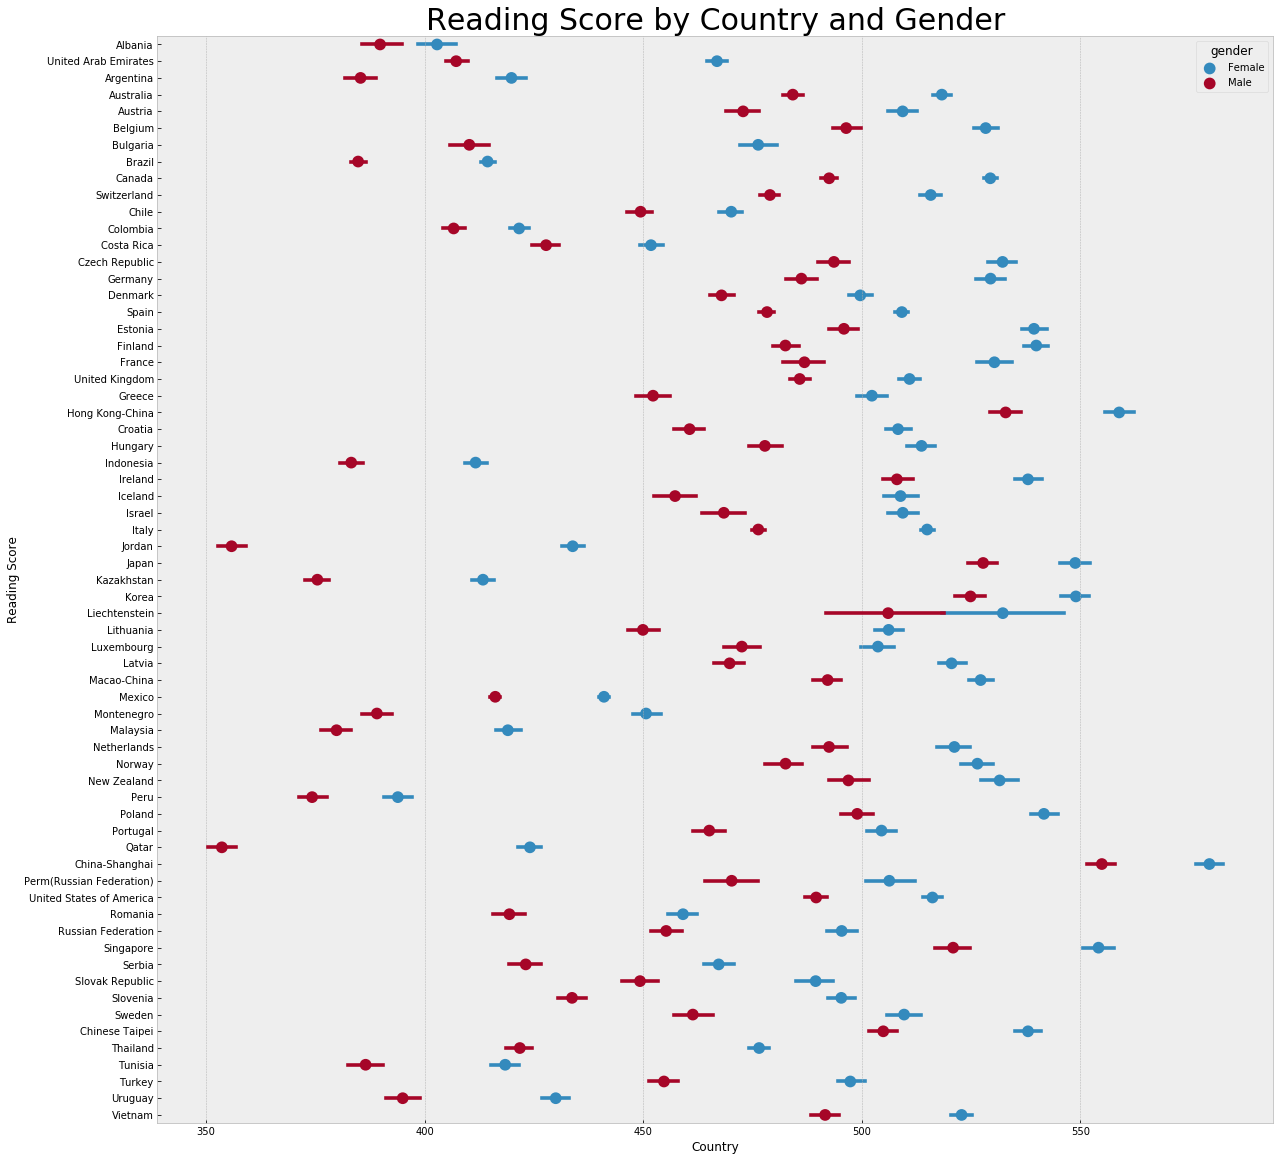

In [507]:
plt.figure(figsize = [20, 20])
ax = sb.pointplot(data = df, y = 'country_code', x = 'reading_score', hue = 'gender', linestyles = "")
plt.title('Reading Score by Country and Gender', size = 30);
plt.xlabel('Country')
plt.ylabel('Reading Score')
plt.savefig(PATH_MULTIVARIATE + 'reading-country-gender.png')

**Observation:** Interestingly enough, ***girls are much more likely to score higher on reading tests than boys for all countries.*** Additionally, the **gap in scores per gender** is much more pronounced.

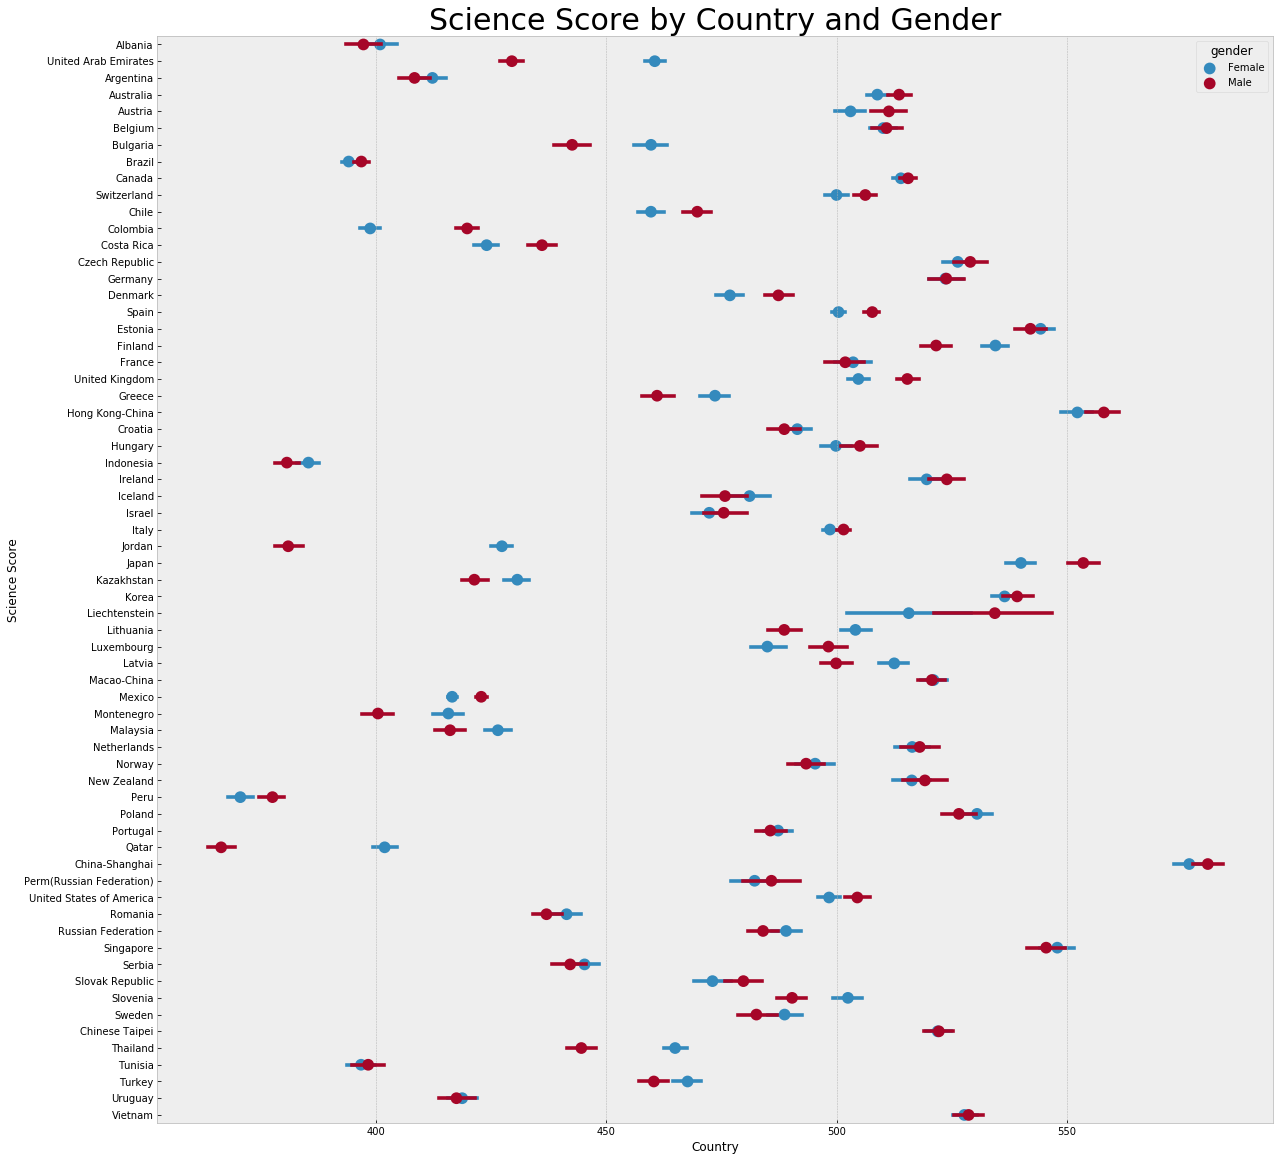

In [508]:
plt.figure(figsize = [20, 20])
ax = sb.pointplot(data = df, y = 'country_code', x = 'science_score', hue = 'gender', linestyles = "")
plt.title('Science Score by Country and Gender', size = 30);
plt.xlabel('Country')
plt.ylabel('Science Score')
plt.savefig(PATH_MULTIVARIATE + 'science-country-gender.png')

**Observation:** The gender gap for science scores is much more varied; there is a good variety of girls outperforming boys for science scores, and vice versa.

***The trends are different among gender per math score. Boys tend to outperform girls on math while girls tend to outperform boys for reading. The gender gap, however, is much more varied for science scores.***

**Country by Immigration Background by Acculturation**

In [459]:
df.groupby(['country_code', 'mother_immigrant']).mean().loc['Finland']

math_score  reading_score  science_score  \
mother_immigrant                                             
No                459.242885     462.655980     472.139215   
Yes               525.152293     530.545757     549.204941   

                  teacher_helpfulness  belonging  acculturation  work_ethic  \
mother_immigrant                                                              
No                           7.527868   7.722007       7.995038    5.948207   
Yes                          7.239770   7.541153            NaN    5.794734   

                  future_optimism  self_esteem  
mother_immigrant                                
No                       8.018778     7.006230  
Yes                      7.692489     7.023424

### Finland has a NaN value for `acculturation`, so let's drop this country just for our heatmap purposes.

In [509]:
temp = df[df['country_code'] != 'Finland']

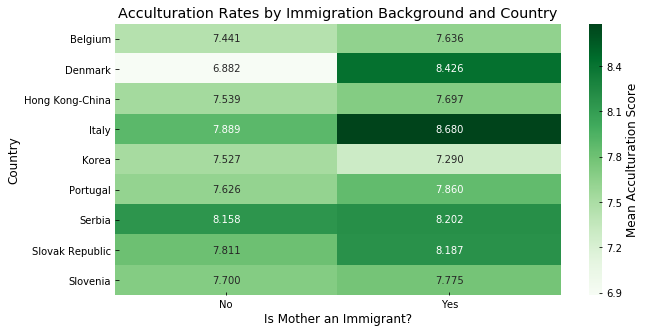

In [510]:
plt.figure(figsize = [10, 5])
cat_means = temp.groupby(['country_code', 'mother_immigrant']).mean()['acculturation']
cat_means = cat_means.reset_index(name = 'Acculturation Average')
cat_means = cat_means.pivot(index = 'country_code', columns = 'mother_immigrant', values = 'Acculturation Average')
sb.heatmap(cat_means, annot = True, fmt = '.3f', cbar_kws = {'label' : 'Mean Acculturation Score'}, cmap = 'Greens')
plt.title('Acculturation Rates by Immigration Background and Country')
plt.xlabel('Is Mother an Immigrant?')
plt.ylabel('Country')
plt.savefig(PATH_MULTIVARIATE + 'country-m-imm-acculturation.png')

### When looking at these select few countries, the darker the color means the better acclimated a student is to their environment. 

**Observation 1:** Italy and Denmark host the students from immigrant backgrounds who feel the most acclimated to their environment.

**Observation 2:** The only exception where student from immigrant backgrounds feel less acclimated is in Korea. This makes sense, considering that Korea is one of the most homogenous countries on Earth. 

### Is the score outperformance of girls in science scores due to girls' higher work ethic? What about the other scores?
**Work Ethic vs. Gender vs. Scores**

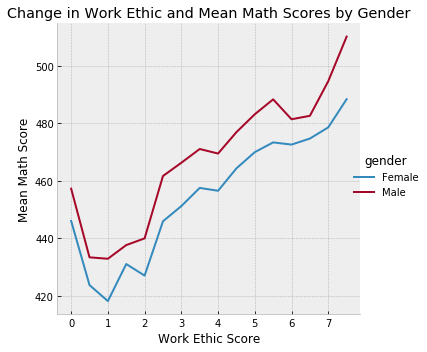

In [538]:
bin_edges = np.arange(0, df.work_ethic.max() + 0.5, 0.5)
g = sb.FacetGrid(data = df, hue = 'gender', height = 5)
g.map(mean_poly, 'work_ethic', 'math_score', bins = bin_edges)
g.set_ylabels('Mean Math Score' )
g.set_xlabels('Work Ethic Score')
plt.title('Change in Work Ethic and Mean Math Scores by Gender')
g.add_legend();
plt.tight_layout()
plt.savefig(PATH_MULTIVARIATE + 'work-ethic-math-gender.png');

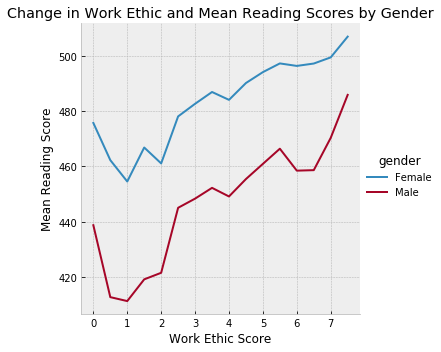

In [539]:
bin_edges = np.arange(0, df.work_ethic.max() + 0.5, 0.5)
g = sb.FacetGrid(data = df, hue = 'gender', height = 5)
g.map(mean_poly, 'work_ethic', 'reading_score', bins = bin_edges)
g.set_ylabels('Mean Reading Score' )
g.set_xlabels('Work Ethic Score')
plt.title('Change in Work Ethic and Mean Reading Scores by Gender')
g.add_legend();
plt.tight_layout()
plt.savefig(PATH_MULTIVARIATE + 'work-ethic-reading-gender.png')

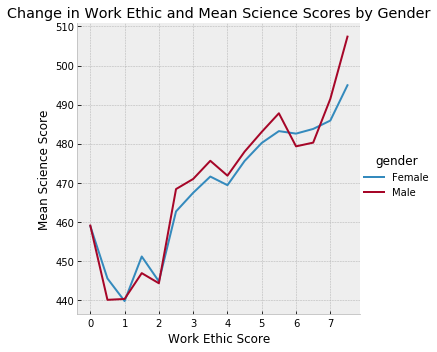

In [540]:
bin_edges = np.arange(0, df.work_ethic.max() + 0.5, 0.5)
g = sb.FacetGrid(data = df, hue = 'gender', height = 5)
g.map(mean_poly, 'work_ethic', 'science_score', bins = bin_edges)
g.set_ylabels('Mean Science Score' )
g.set_xlabels('Work Ethic Score')
plt.title('Change in Work Ethic and Mean Science Scores by Gender')
g.add_legend();
plt.tight_layout()
plt.savefig(PATH_MULTIVARIATE + 'work-ethic-science-gender.png')

**Observation 1:** The higher the student's work ethic, boys *always* outperform girls for math scores.

**Observation 2:** The higher the student's work ethic, girls *always* outperform boys for reading scores.

**Observation 3:** There are many overlaps between science scores between boys and girls, so it is hard to draw a trend conclusion. We can only say that science scores depict an overall positive trend wih work ethic for both genders.

### Despite girls having an overall higher work ethic, if a boy and girl had the same work ethic score, *the boy is most certainly guaranteed to score higher for math.* However, the *contrary is true for reading scores.*


### Were there features that strengthened each other in terms of examining the features of interest?

- The previous plots depicted that girls score better than boys on reading tests for all countries. However, I dove in a little deeper and ***analyzed how work ethic impacted scores for both genders.*** Despite girls having an overall higher work ethic, if a boy and girl had the same work ethic score, the boy is most certainly guaranteed to score higher for math. The contrary is true for reading scores, where girls prevail. *Perhaps this is reflective of the culture of girls being discouraged from pursuing STEM.*

- We established previously that students from immigrant backgrounds tend to acclimate better to their environment. However, we added a layer of complexity by comparing ***acculturation rates of students from immigrant backgrounds by country.*** From the above selected countries, Denmark and Italy are the two countries with the biggest differences in acculturation rates, in favor or students from immigrant backgrounds.

### Were there any interesting or surprising interactions between features?

- Italy and Denmark host the students from immigrant backgrounds who feel the most acclimated to their environment. However, the only exception where students from immigrant backgrounds feel less acclimated is in Korea. This makes sense, considering that Korea is one of the most homogenous countries on Earth.

- The trends are different among gender per math score. Boys tend to outperform girls on math while girls tend to outperform boys for reading. The gender gap, however, is much more varied for science scores.

# Resources
- [A Better Visualization of Pie Charts](https://medium.com/@kvnamipara/a-better-visualisation-of-pie-charts-by-matplotlib-935b7667d77f)
- [Github Repository](https://github.com/cooljade007/communicate_data_findings)